<a href="https://colab.research.google.com/github/Pkolekar940/Mobile-Price-Range-Prediction/blob/main/mobile_price_range_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member-** Pramod Kolekar

# **Project Summary -**

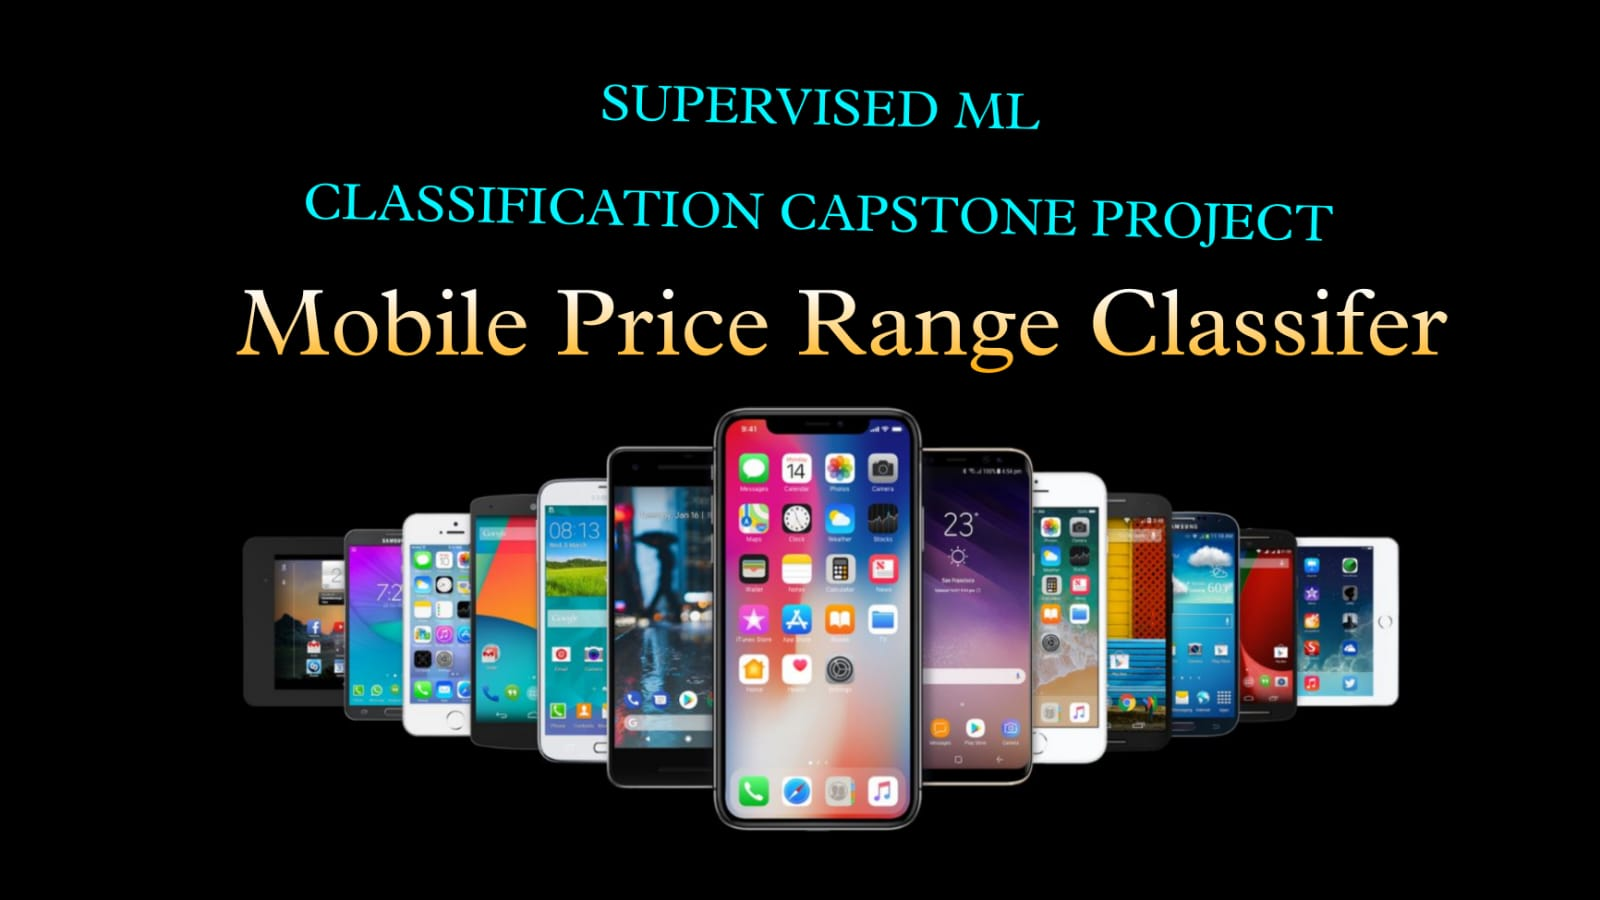

# **GitHub Link -**
https://github.com/Pkolekar940/Mobile-Price-Range-Prediction/blob/main/mobile_price_range_classifier_.ipynb

# **Problem Statement -**


**In the competitive mobile phone market companies want to understand sales df of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

# ***Let's Begin !***

## ***1. Know Your df***

### Import Libraries


In [189]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

### dataset Loading

In [190]:
# Load the database

url='https://drive.google.com/file/d/1i8bO3xv3x8SzXSeSkDl-2qYjCyc9vxA2/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

### dataset First View

In [191]:
# dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### dataset Rows & Columns count

In [192]:
# dataset Rows & Columns count
df.shape

(2000, 21)

### dataset Information

In [193]:
# dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Duplicate Values

In [194]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

* ***In the above df after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

#### Missing Values/Null Values

In [195]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

* ***As we can see above there are no missing value presents thankfully***

<Axes: >

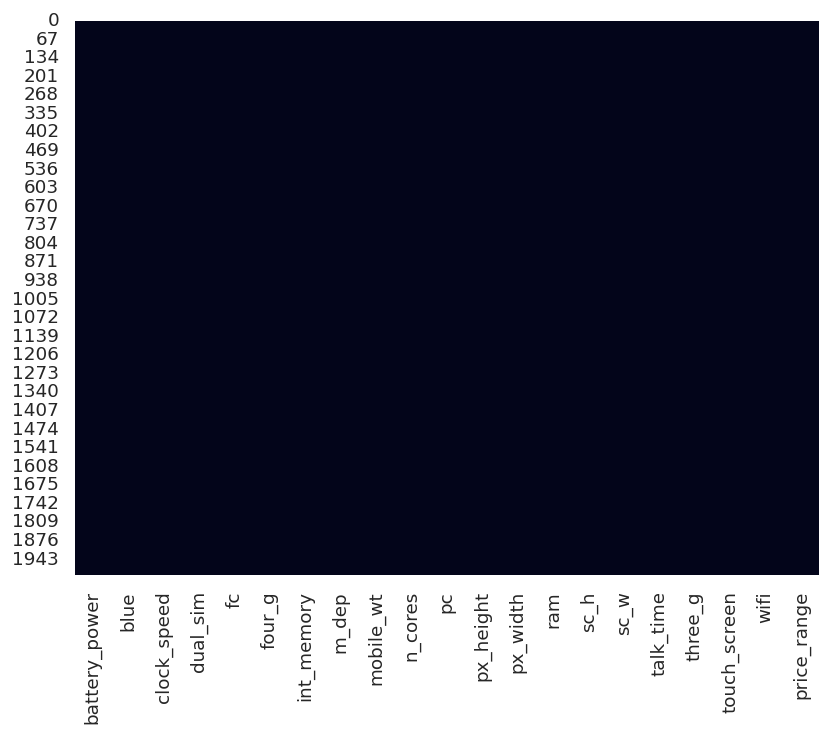

In [196]:
# Let's Visualizing the missing values
# to visualize missing data we can use the heatmap method.

# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":120, "figure.figsize":(8,6)})
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dfset?

**After careful examination, it is evident that there are no null values present in the df. Furthermore, we can confidently state that there are no duplicate values as well.**

## ***2. Understanding Your Variables***

In [197]:
# dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [198]:
# dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description



$\color{red}{\text{Battery power}}$ - Total energy a battery can store in one time, measured in mAh


$\color{red}{\text{Blue}}$ - Has bluetooth or not


$\color{red}{\text{Clock speed}}$ - Speed at which the microprocessor executes instructions


$\color{red}{\text{Dual sim}}$ - Has dual sim support or not


$\color{red}{\text{Fc}}$ - Front Camera megapixels


$\color{red}{\text{Four_g}}$ - Has 4G or not


$\color{red}{\text{Int memory}}$ - Internal Memory in Gigabytes


$\color{red}{\text{M_dep}}$ - Mobile Depth in cm


$\color{red}{\text{Mobile wt}}$ - Weight of mobile phone


$\color{red}{\text{N_cores}}$ - Number of cores of the processor


$\color{red}{\text{Pc}}$ - Primary Camera megapixels


$\color{red}{\text{Px_height}}$ - Pixel Resolution Height


$\color{red}{\text{Px_width}}$ - Pixel Resolution Width


$\color{red}{\text{Ram}}$ - Random Access Memory in MegaBytes


$\color{red}{\text{Sc_h}}$ - Screen Height of mobile in cm


$\color{red}{\text{Sc_w}}$ - Screen Width of mobile in cm


$\color{red}{\text{Talk_time}}$ - Longest time that a single battery charge will last


$\color{red}{\text{Three_g}}$ - Has 3G or not


$\color{red}{\text{Touch screen}}$ - Has touch screen or not


$\color{red}{\text{Wifi}}$ - Has wifi or not


$\color{red}{\text{Price range}}$ - This is the target variable with values of 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost).

### Check Unique Values for each variable.

In [199]:
# Let's Check Unique Values for each variable.

for ele in df.columns.to_list():
  print(f'Number of unique values in {ele} is {df[ele].nunique()}.')

Number of unique values in battery_power is 1094.
Number of unique values in blue is 2.
Number of unique values in clock_speed is 26.
Number of unique values in dual_sim is 2.
Number of unique values in fc is 20.
Number of unique values in four_g is 2.
Number of unique values in int_memory is 63.
Number of unique values in m_dep is 10.
Number of unique values in mobile_wt is 121.
Number of unique values in n_cores is 8.
Number of unique values in pc is 21.
Number of unique values in px_height is 1137.
Number of unique values in px_width is 1109.
Number of unique values in ram is 1562.
Number of unique values in sc_h is 15.
Number of unique values in sc_w is 19.
Number of unique values in talk_time is 19.
Number of unique values in three_g is 2.
Number of unique values in touch_screen is 2.
Number of unique values in wifi is 2.
Number of unique values in price_range is 4.


## 3. ***df Wrangling***

### Data Wrangling Code

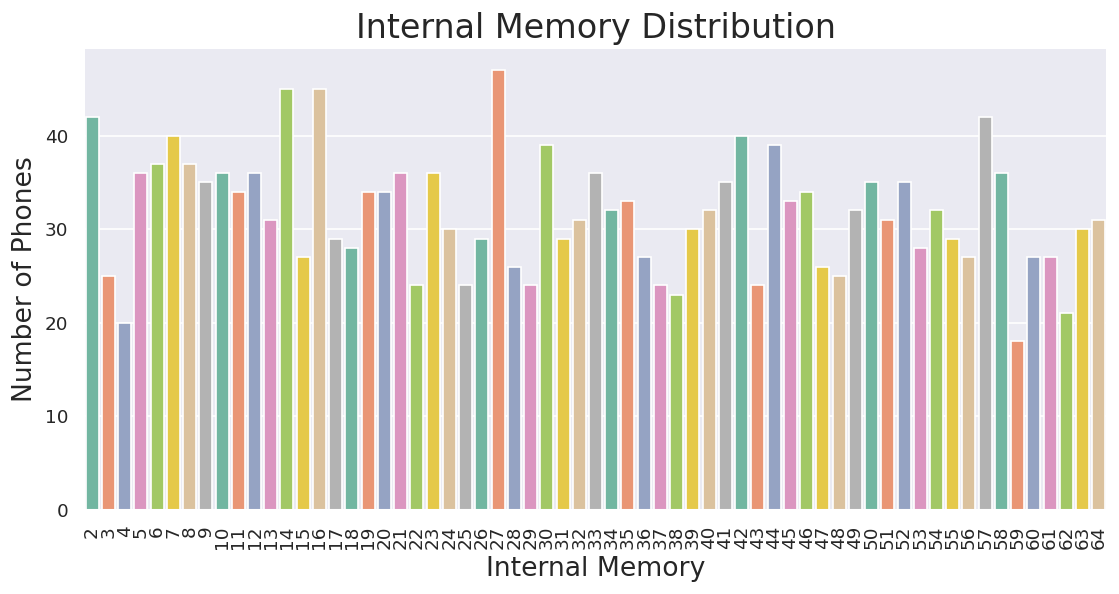

In [200]:
# Let's plot Countplot for Inter Memory of Mobile.

plt.figure(figsize=(11, 5))
sns.countplot(x='int_memory', data=df, palette='Set2')

plt.title('Internal Memory Distribution', size=20)
plt.xticks(rotation=90)
plt.xlabel('Internal Memory', size=16)
plt.ylabel('Number of Phones', size=16)

plt.show()


* Why did you pick the specific chart?
1. Count plots are used to visualize the frequency distribution of categorical variables, making it easy to compare and explore data.






* What is/are the insight(s) found from the chart?
1. The "Internal Memory" feature is categorized into 63 distinct classes, and class 27 have a significant number of mobile devices associated with them.

In [201]:
# Let's create some ideal bin
ideal_values = np.array([2, 4, 8, 16, 32, 64])

# Map the values in 'int_memory' column to the nearest ideal value using lambda function
df['int_memory'] = df['int_memory'].apply(lambda x: ideal_values[np.abs(ideal_values - x).argmin()])

# Test the updated DataFrame
print(df['int_memory'].unique())


[ 8 64 32 16  4  2]


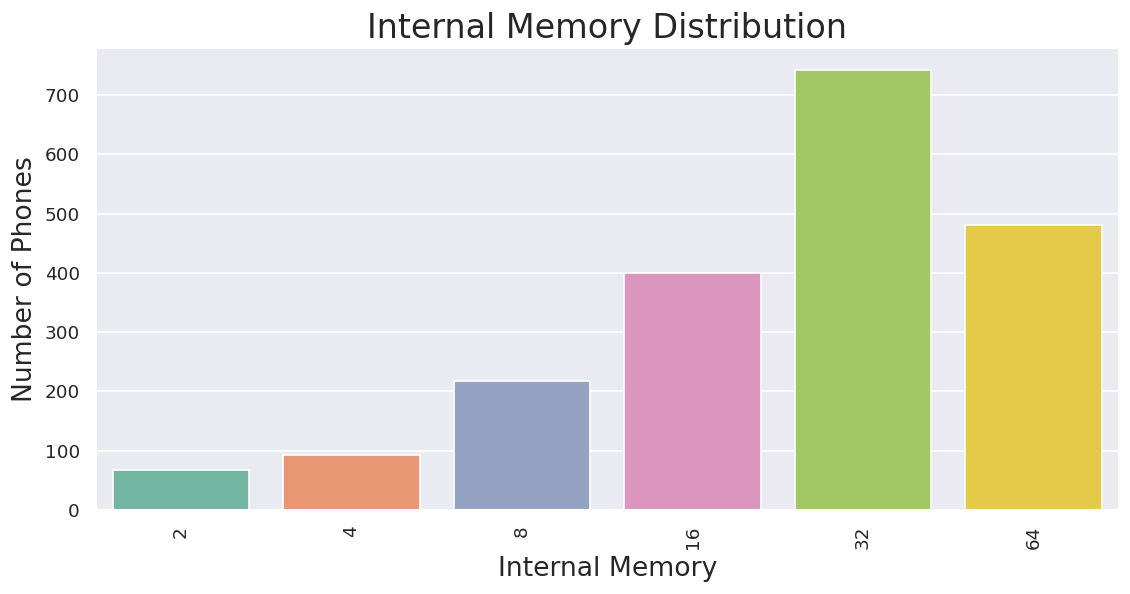

In [202]:
# Let's plot New countplot after creating bins
plt.figure(figsize=(11, 5))
sns.countplot(x='int_memory', data=df, palette='Set2')
plt.title('Internal Memory Distribution', size=20)
plt.xticks(rotation=90)
plt.xlabel('Internal Memory', size=16)
plt.ylabel('Number of Phones', size=16)

plt.show()


* Why did you pick the specific chart?
1. To see the frequency distrubution of Internal Memory after creating bins.

* What is/are the insight(s) found from the chart?
1. After observing the plot

In [203]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>=6:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [204]:
# Let's print numerical columns
print(numerical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [205]:
# Let's print categorical columns
print(categorical_columns)

['touch_screen', 'wifi', 'four_g', 'blue', 'dual_sim', 'three_g', 'price_range']


### What all manipulations have you done and insights you found?

* I separated numerical and categorical variables, we can effectively handle, analyze, and preprocess each type of variable appropriately, leading to more accurate and insightful data analysis and modeling.

## ***4. df Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [206]:
import plotly.graph_objects as go

# Calculate the percentage of each price range category
percentage_low_cost = len(df[df.price_range == 0]) / len(df) * 100
percentage_medium_cost = len(df[df.price_range == 1]) / len(df) * 100
percentage_high_cost = len(df[df.price_range == 2]) / len(df) * 100
percentage_very_high_cost = len(df[df.price_range == 3]) / len(df) * 100

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'],
    values=[percentage_low_cost, percentage_medium_cost, percentage_high_cost, percentage_very_high_cost],
    hole=0.5,
    textinfo='percent',
    marker=dict(colors=['#b20710', '#ff7100', '#f9f871', '#55a630'])
)])

# Set the title and legend color
title_color = '#8a8d93'
legend_color = 'white'

fig.update_layout(
    title='Mobile Price Range Distribution',
    title_font=dict(size=25, color=title_color, family="Lato, sans-serif"),
    plot_bgcolor='#444',
    paper_bgcolor='#444',
    legend=dict(
        bgcolor='rgba(0,0,0,0)',  # Set the legend background color to transparent
        font=dict(color=legend_color)
    )
)

# Display the chart
fig.show(renderer='colab')


* Why did you pick the specific chart?
1.  Donut charts allow for easy comparison between categories or values.

* What is/are the insight(s) found from the chart?

1. Our target feature is evenly divided into four equal parts, each representing 25%.

#### Chart - 2

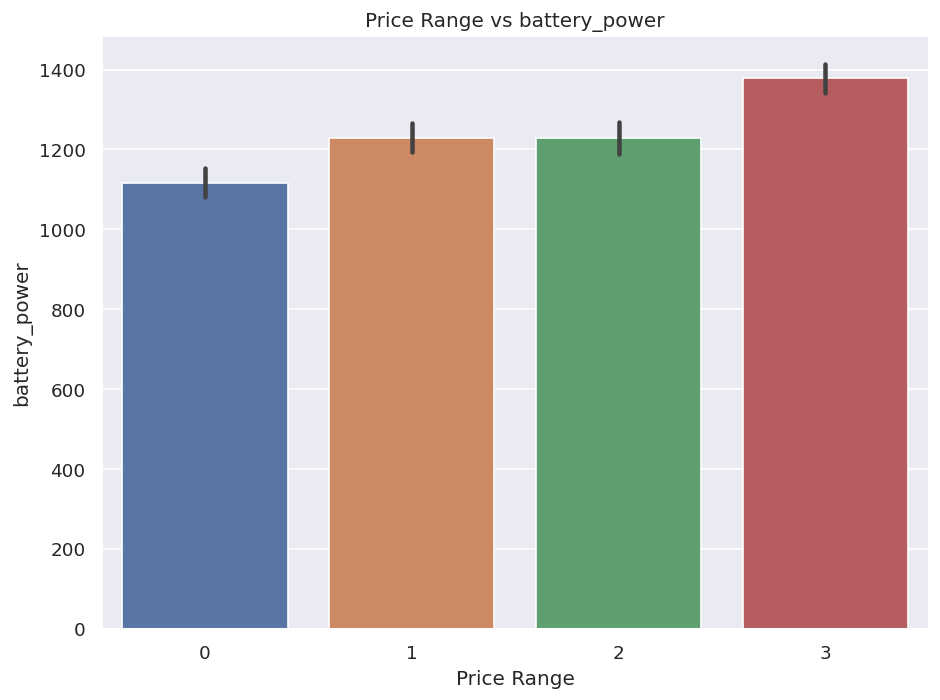

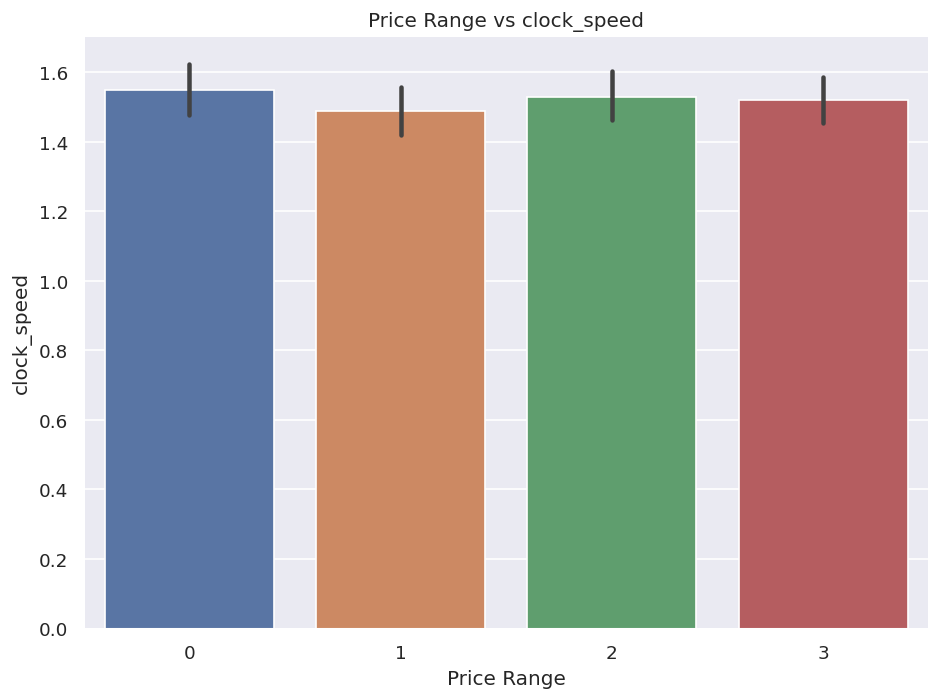

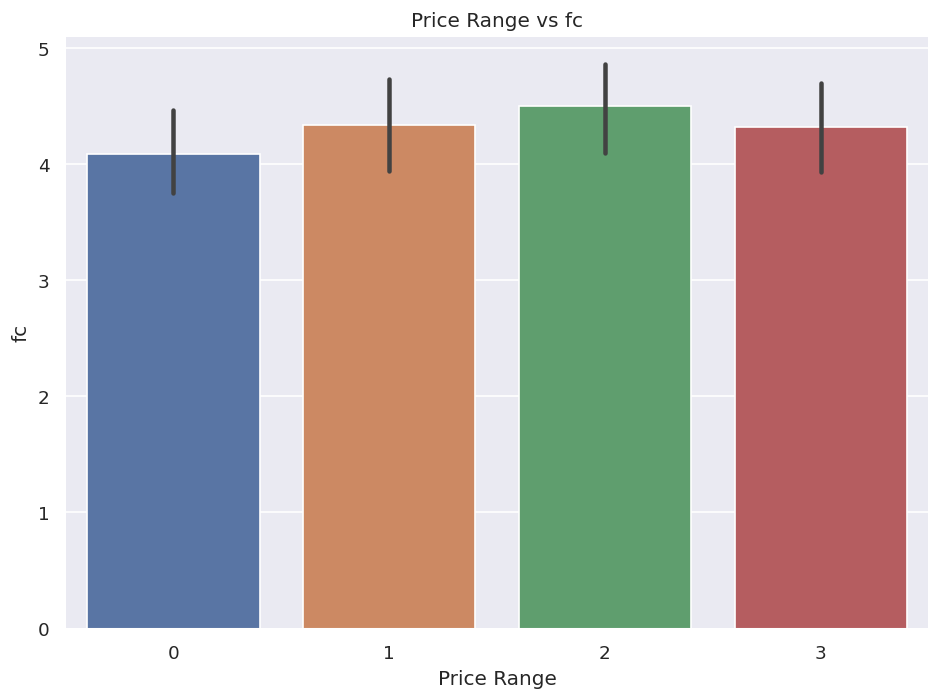

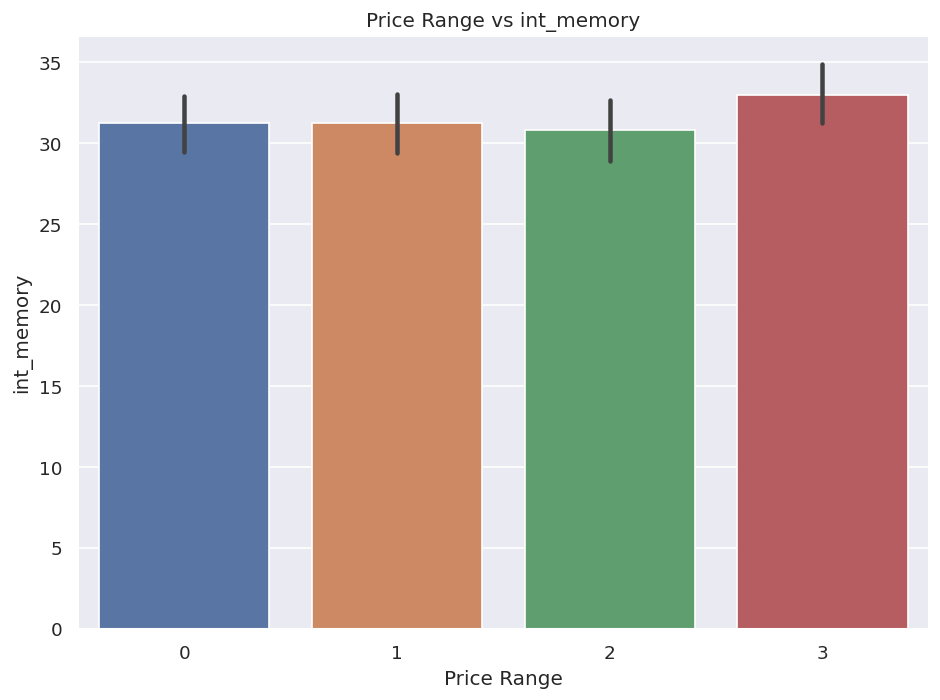

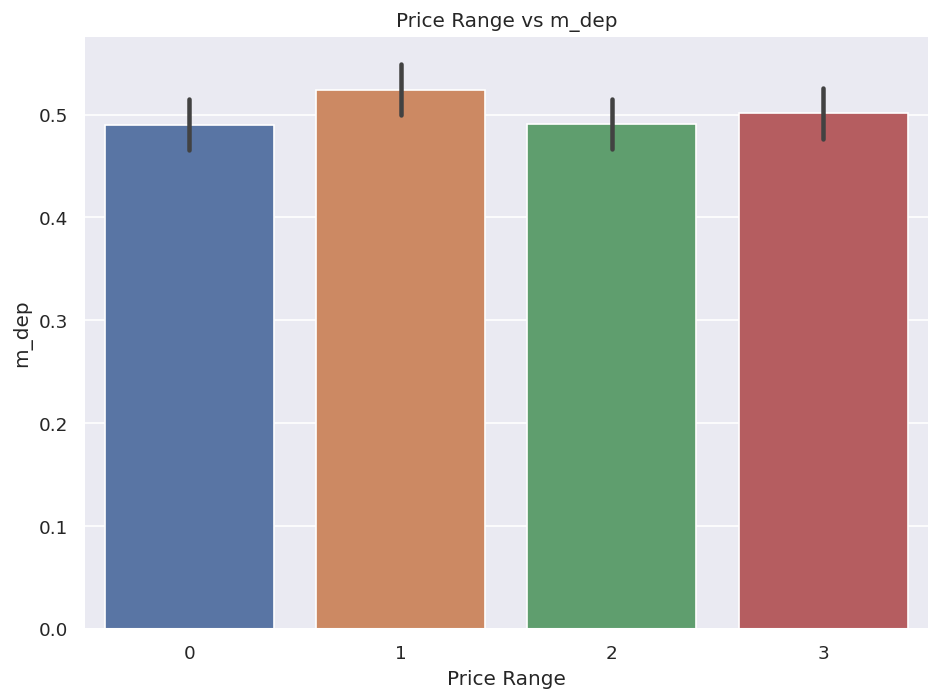

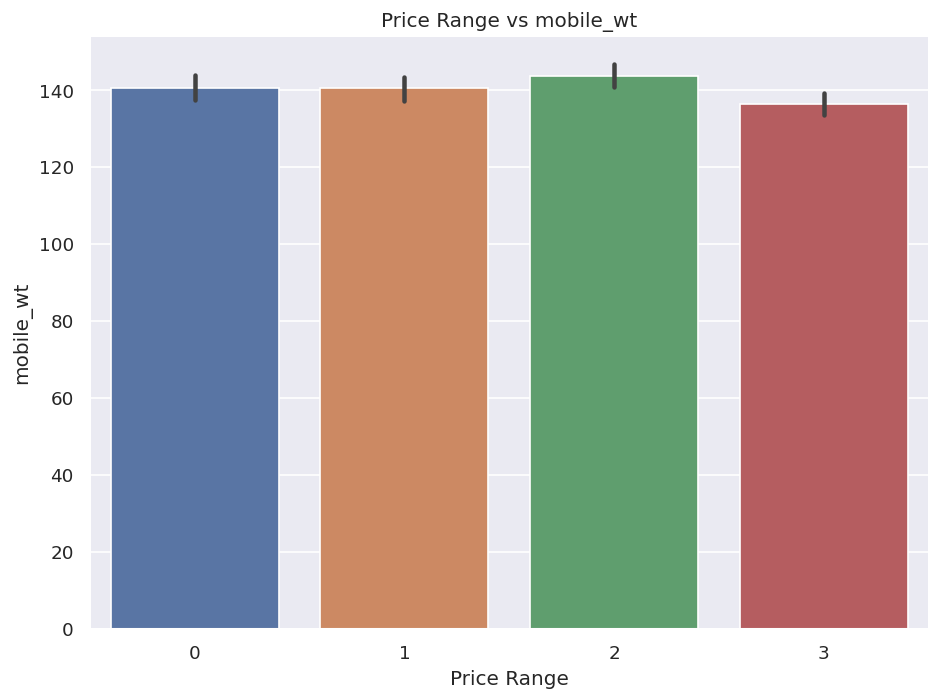

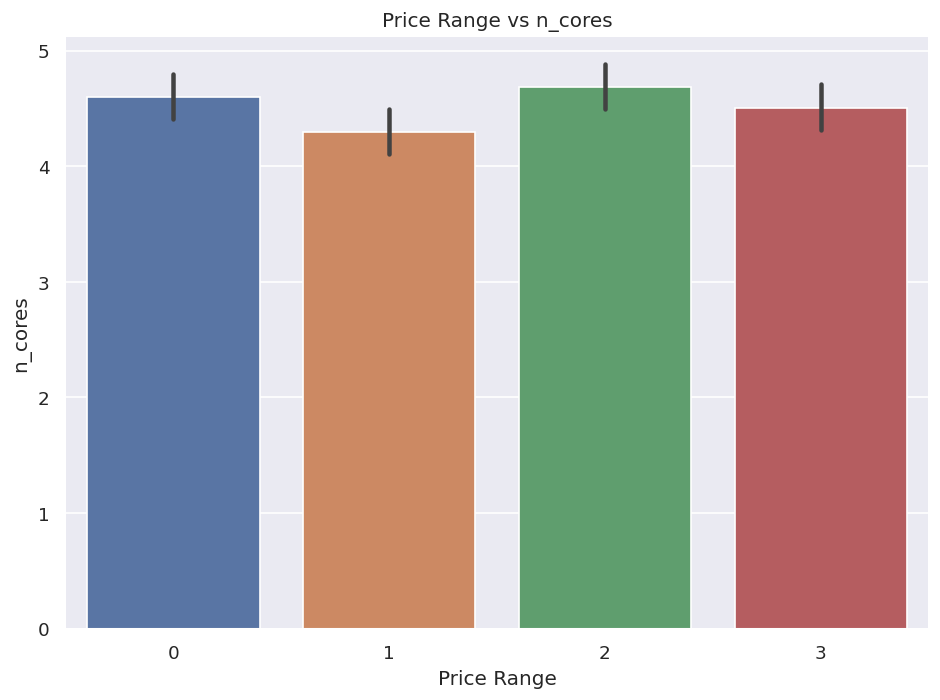

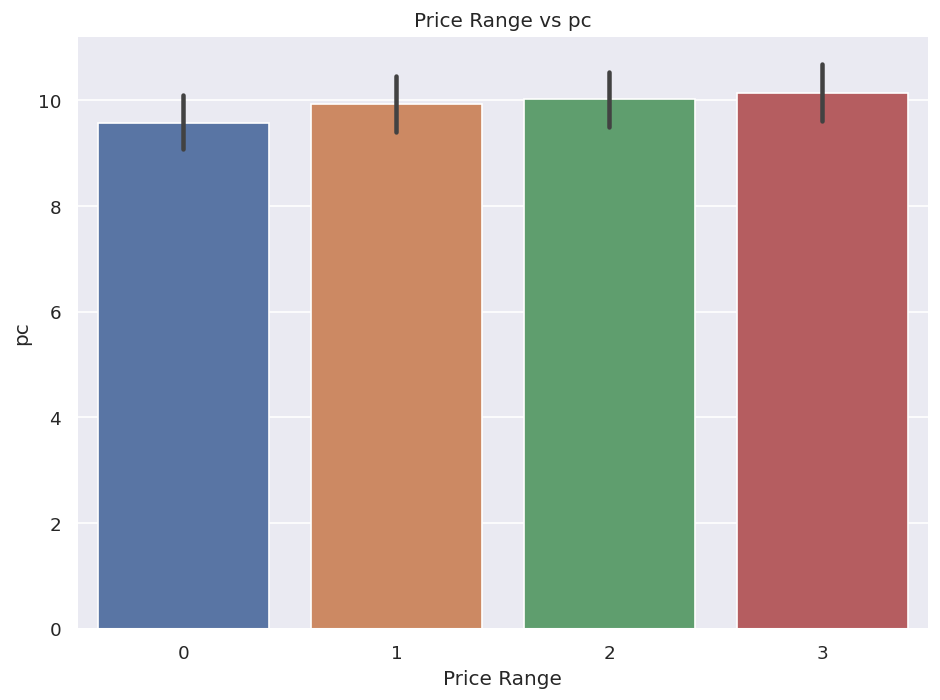

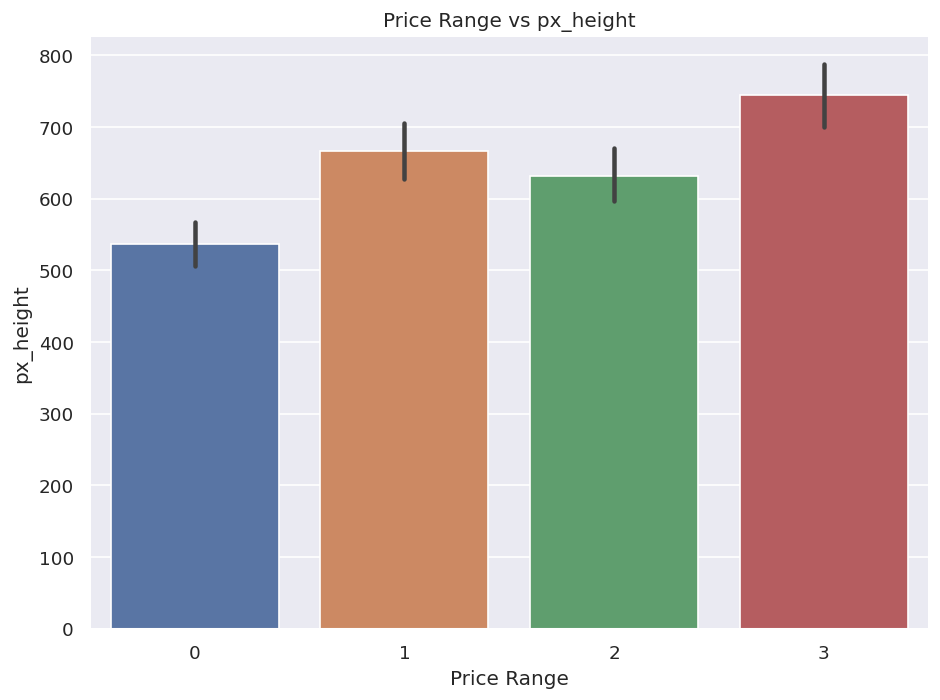

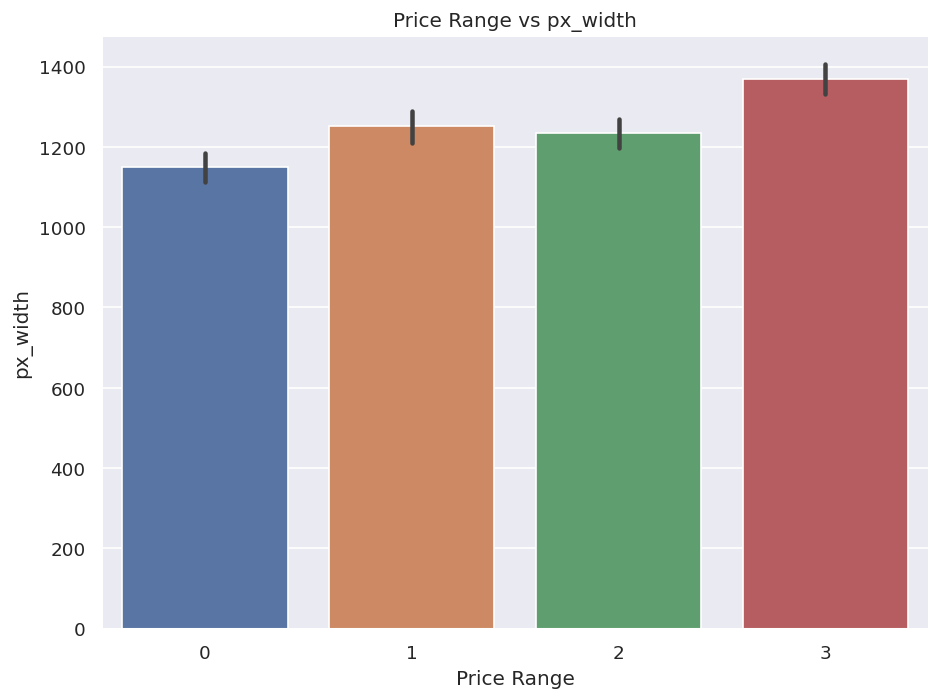

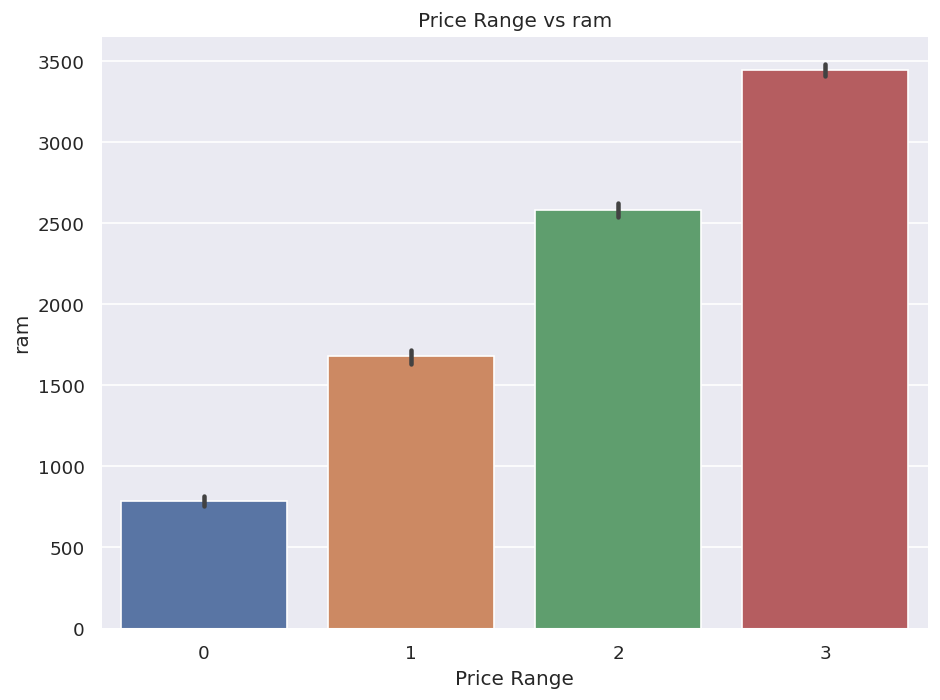

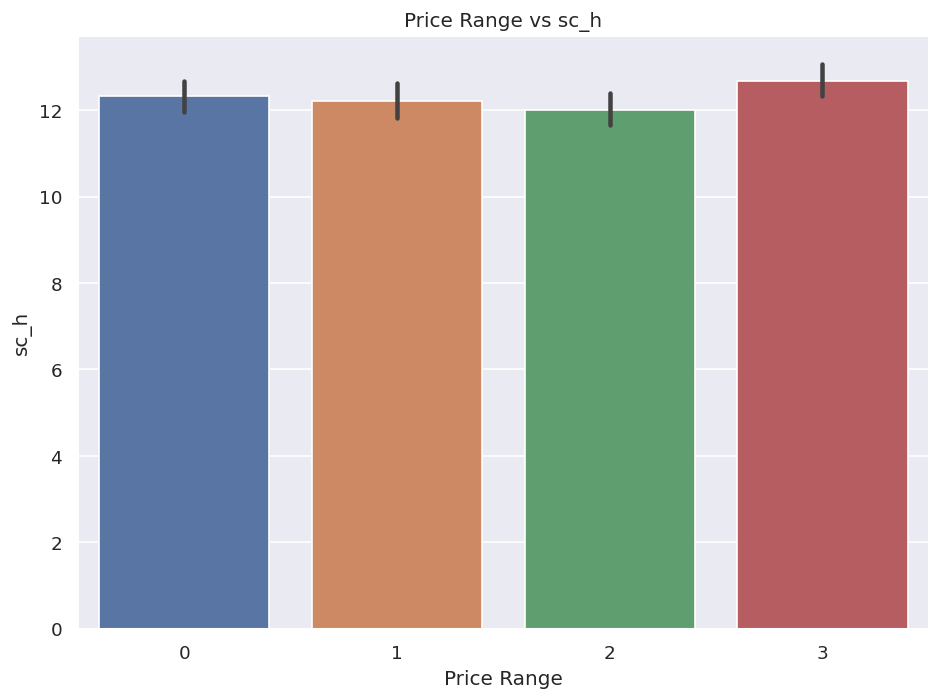

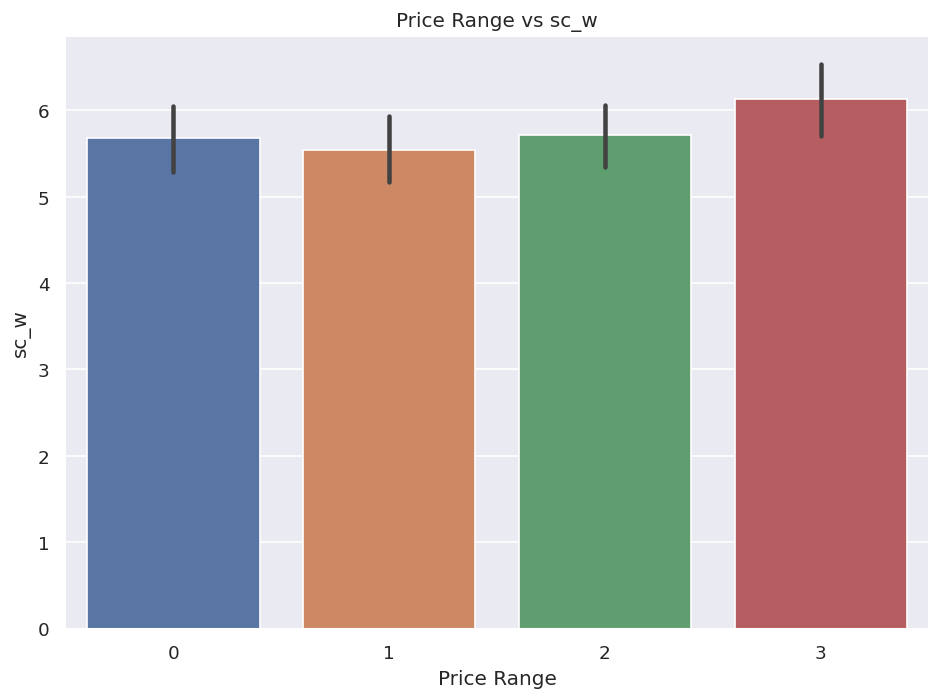

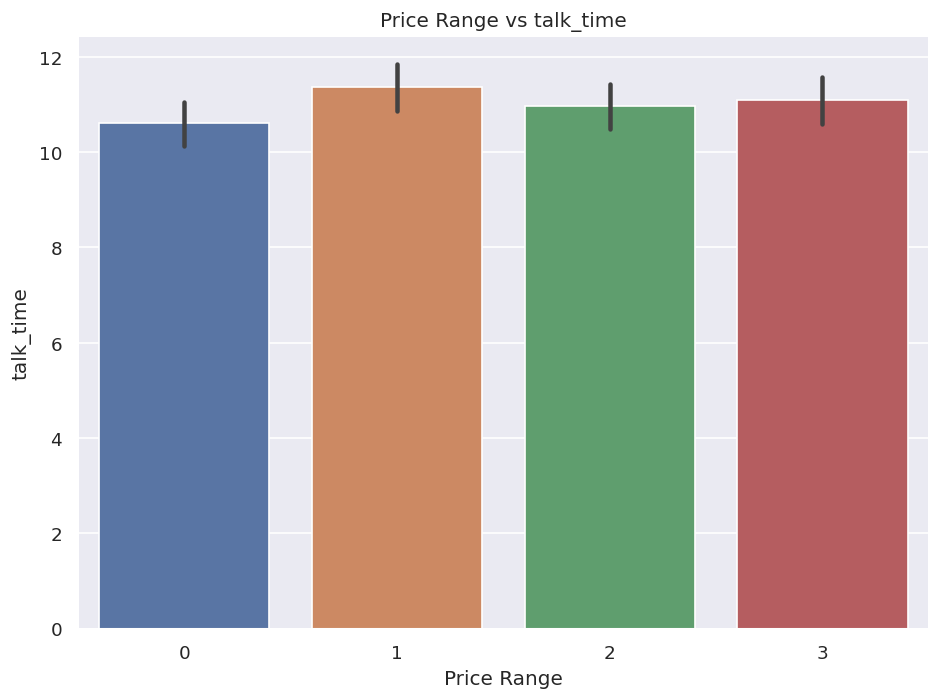

In [207]:
# Let's plot barplot in-order to see relation of target variable with every feature
for var in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=df['price_range'], y=df[var])
    plt.title(f'Price Range vs {var}')
    plt.xlabel('Price Range')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

*   Why did you pick the specific chart?

1. Bar graphs are easy to read and understand, making them a popular choice for presenting df in reports and presentations.

*   What is/are the insight(s) found from the chart?

1. Ram, resolution, battery power, and internal memory capacity show a linear relationship with the price range.

2. Clock speed, front camera megapixels, mobile depth, number of cores, primary camera, and talk time do not exhibit a linear relationship with the price range.

In [208]:
# Removing price range column from categorical list.
categorical_columns.remove('price_range')

#### Chart - 3

In [209]:
# Let's visualize the availability of features by creating a donut graph.

for col in categorical_columns:
    percentage_not_available = len(df[df[col] == 0]) / len(df) * 100
    percentage_available = len(df[df[col] == 1]) / len(df) * 100

    fig = go.Figure(data=[go.Pie(
        labels=['Not Available', 'Available'],
        values=[percentage_not_available, percentage_available],
        hole=0.5,
        textinfo='percent',
        marker=dict(colors=['#b20710', '#ff7100'])
    )])
    fig.update_layout(
        title=f'{col} Availability',
        title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif")
    )

    fig.show(renderer='colab')


* Why did you pick the specific chart?

1.  Donut charts allow for easy comparison between categories or values.

* What is/are the insight(s) found from the chart?

1. Most of the features are evenly distributed apart from three_g column
2. There 76 % Mobile who support 3G

#### Chart - 4

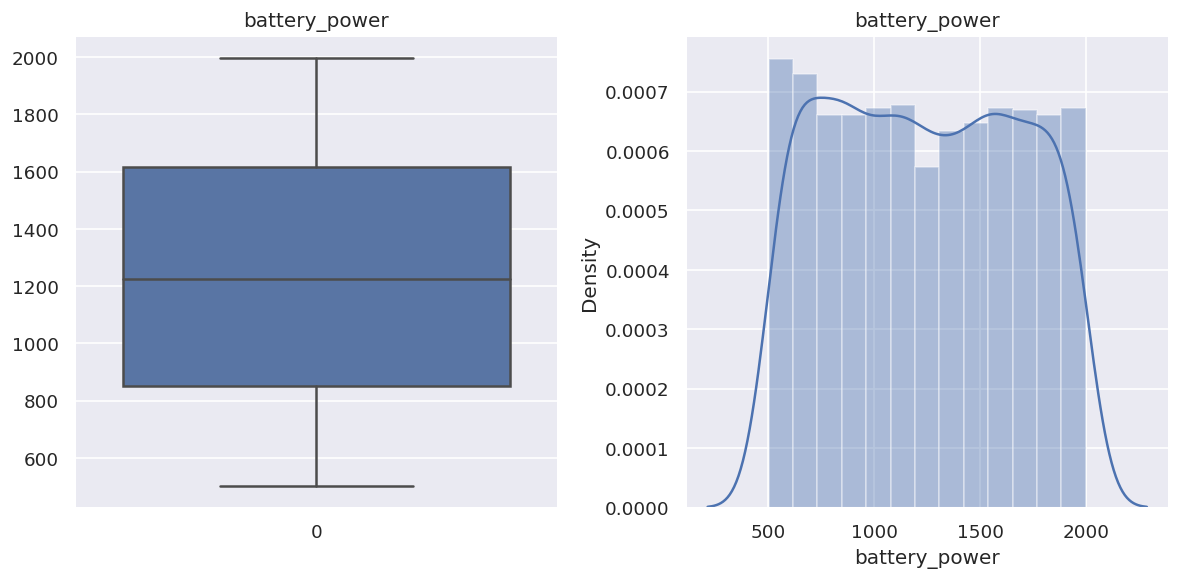

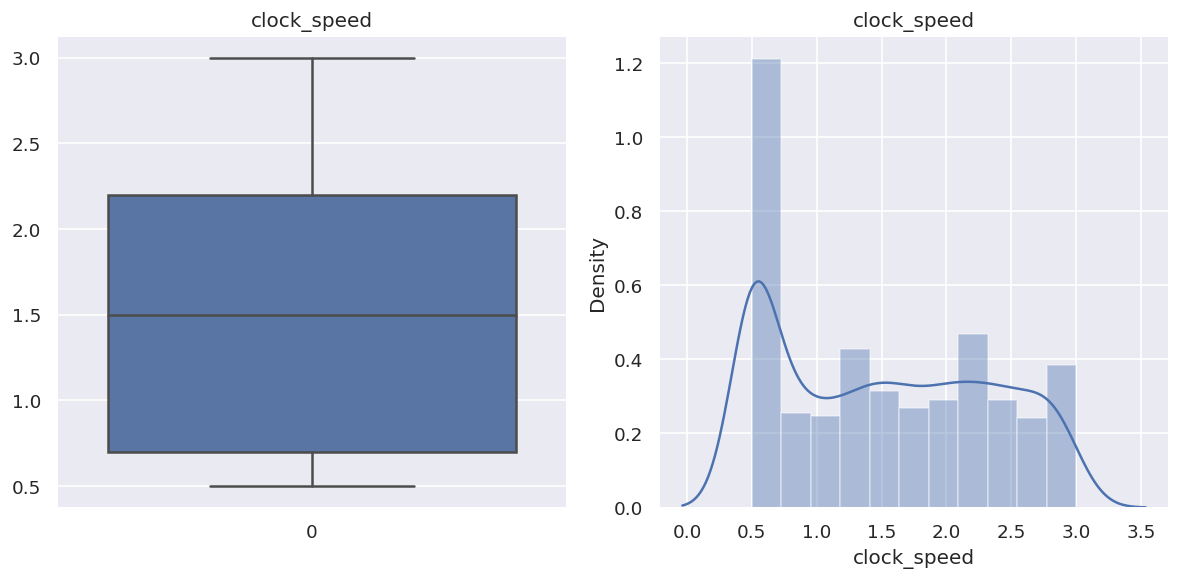

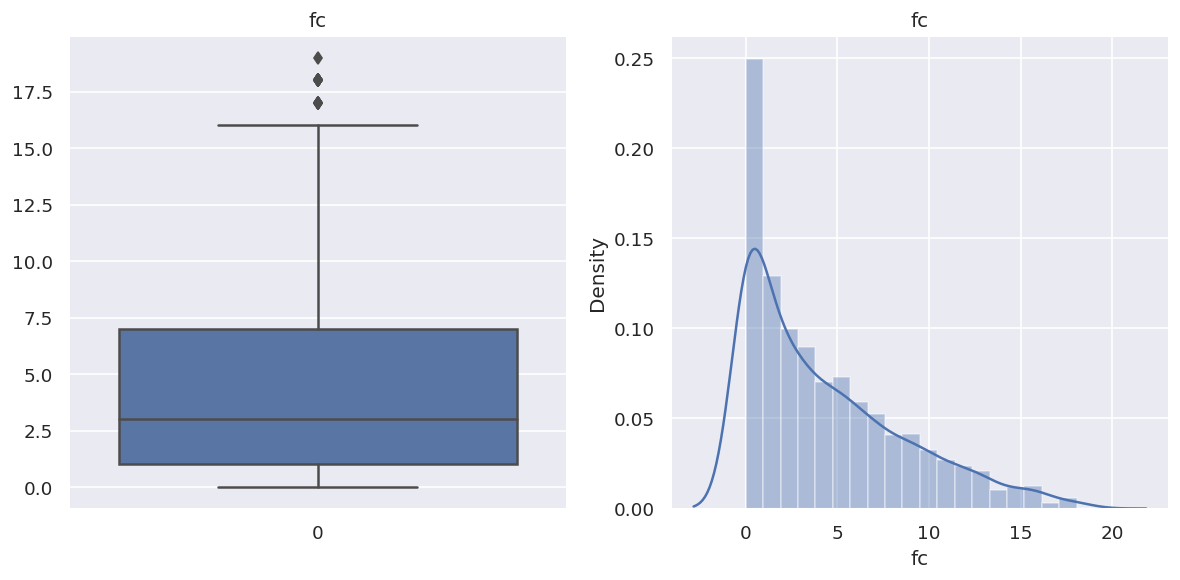

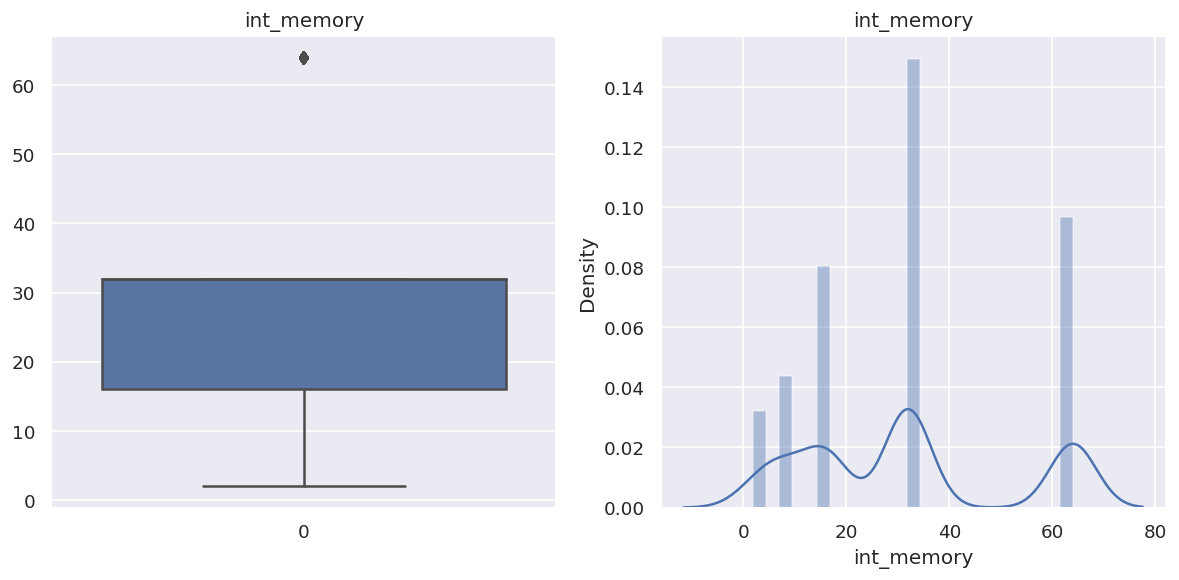

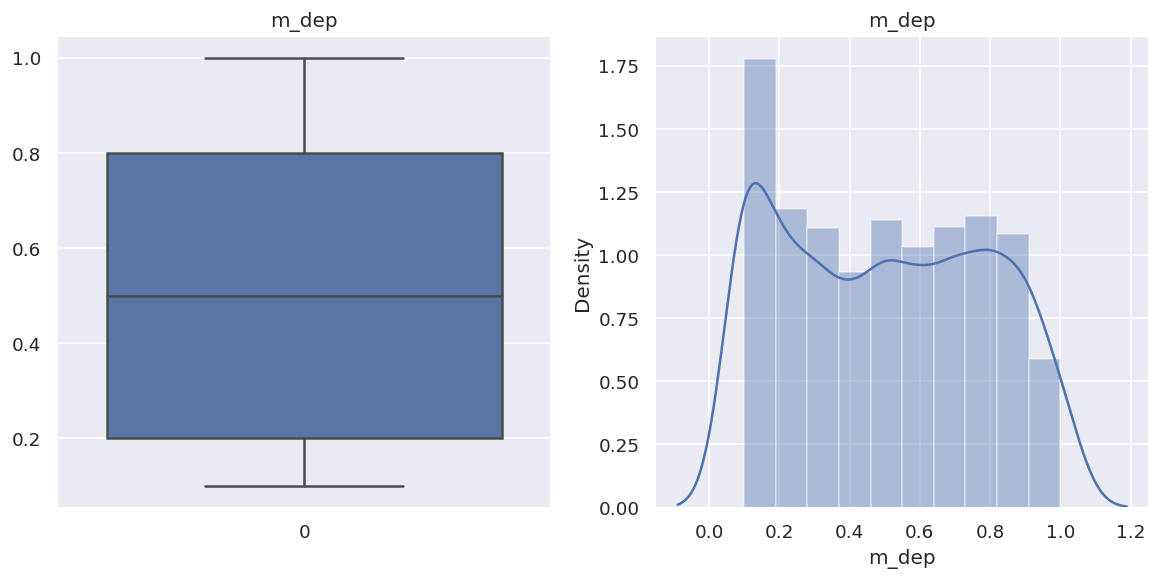

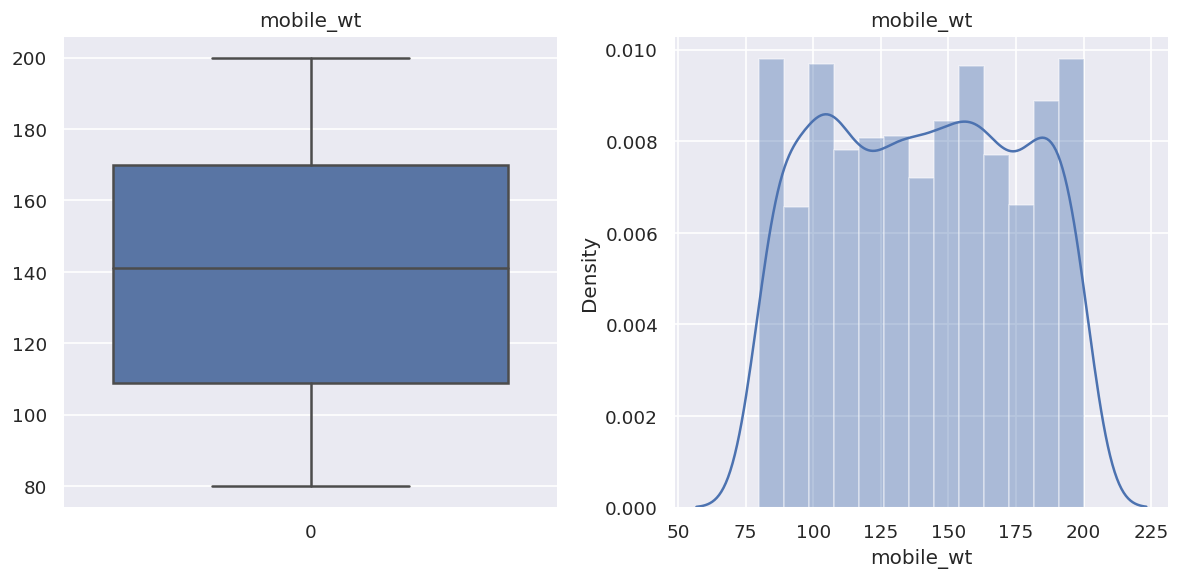

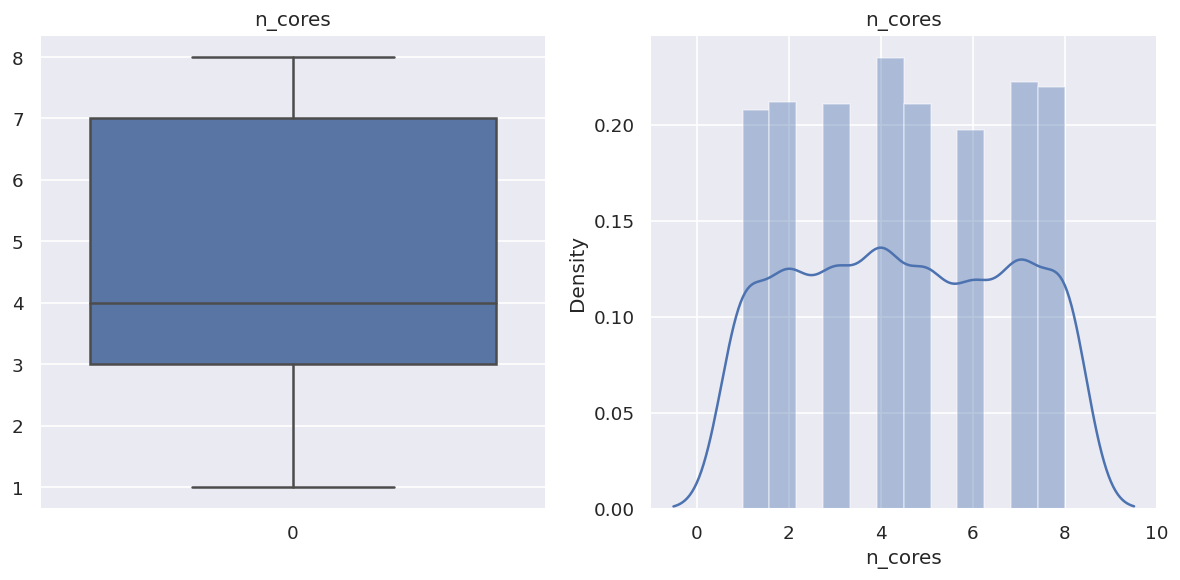

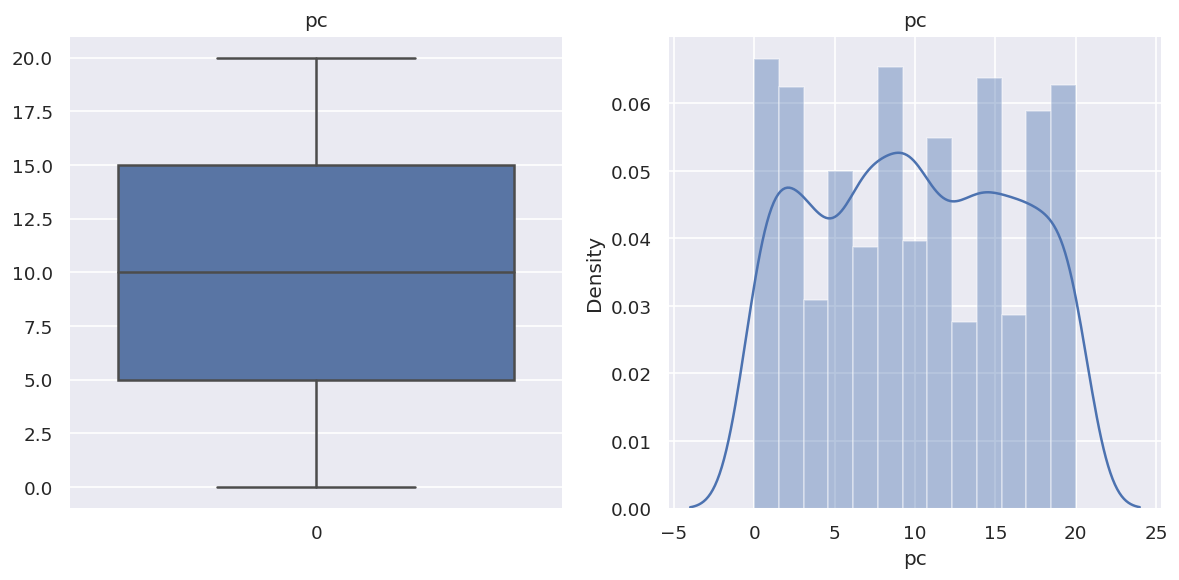

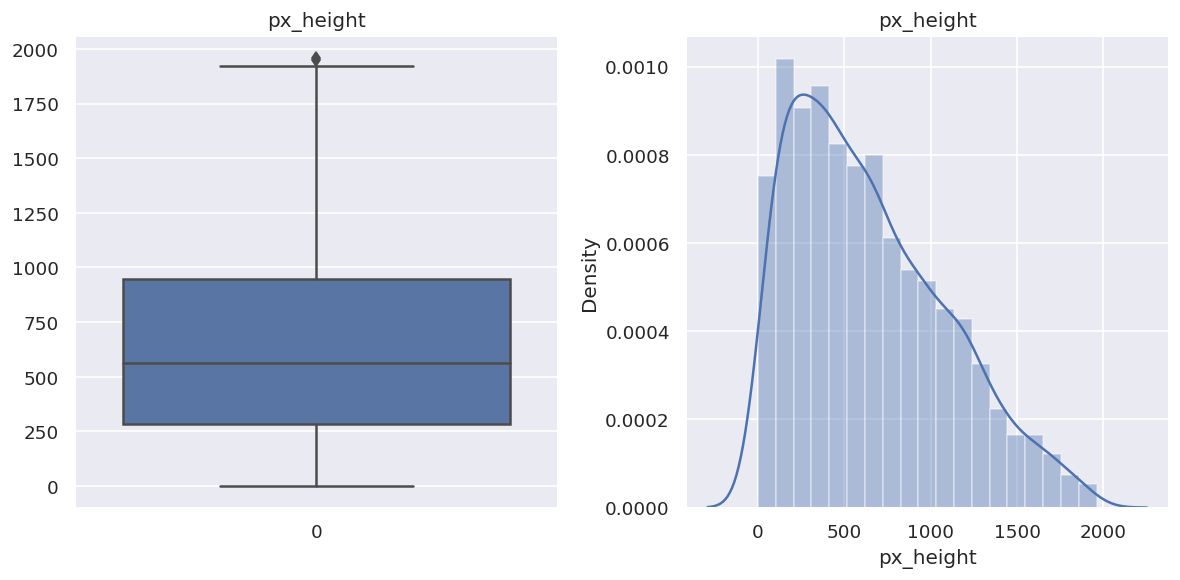

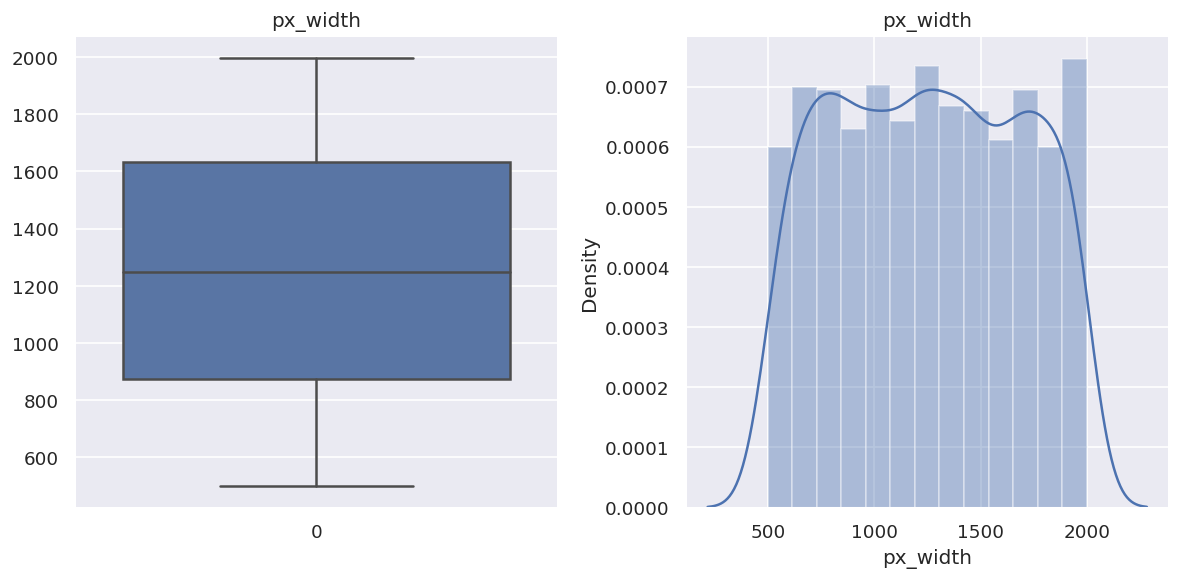

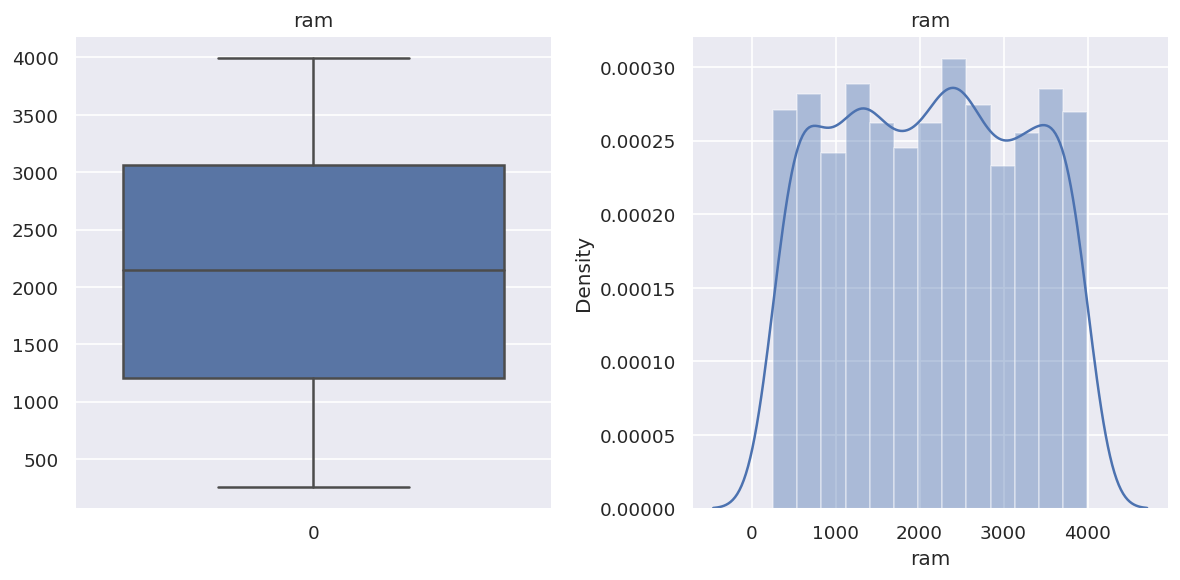

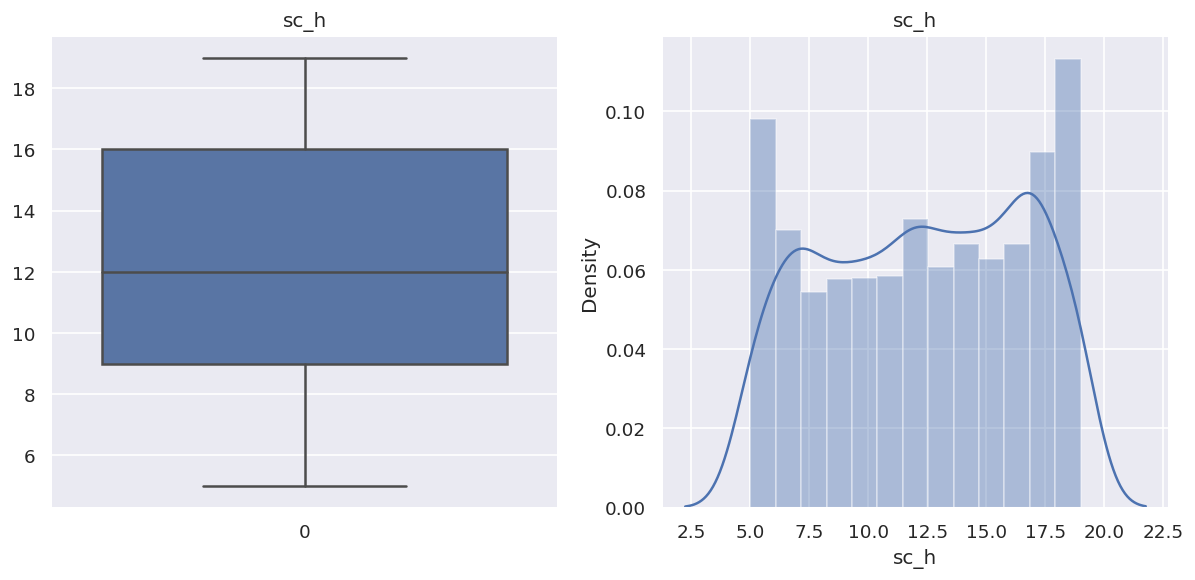

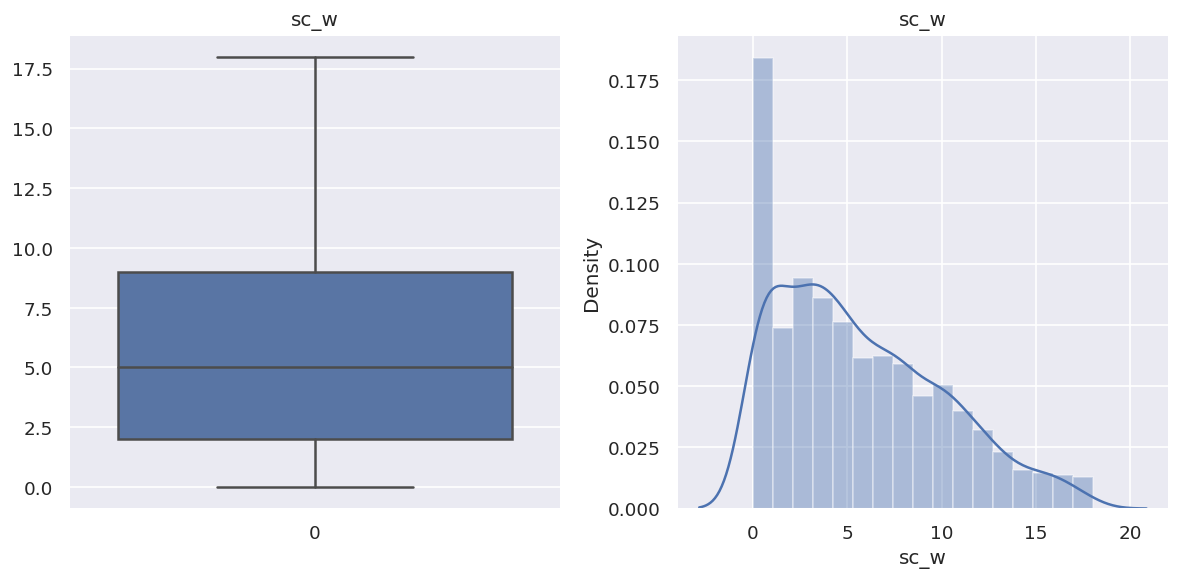

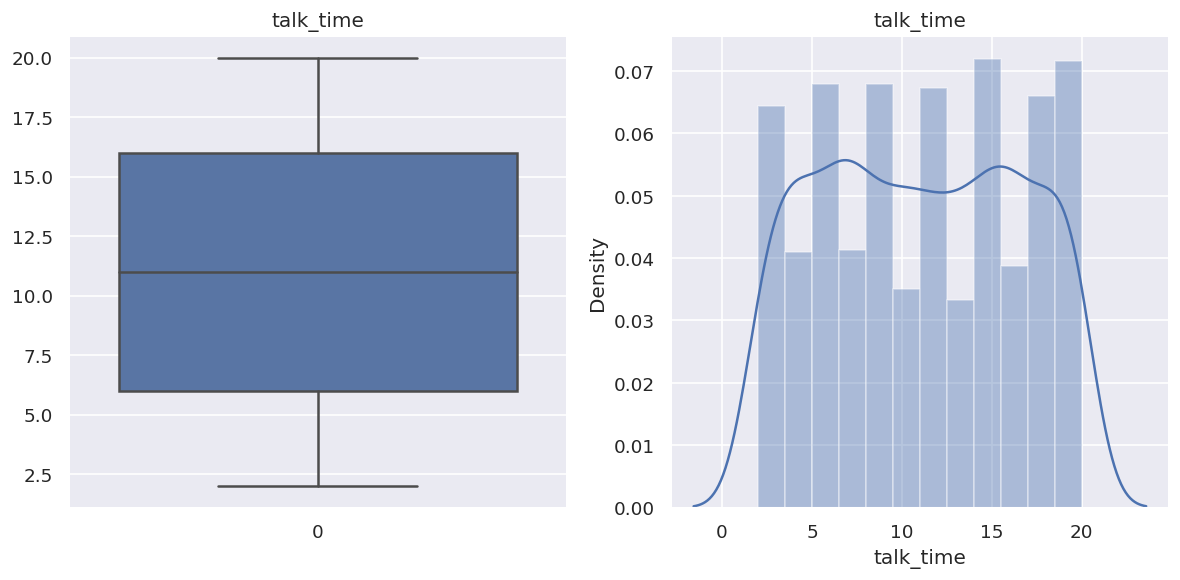

In [210]:
# Perform Univariate Analysis on modified dataframe data
for col in numerical_columns:
  #poltting boxplot
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(df[col])
    fig.set_title(col)
  #Plotting displot
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col])
    fig.set_title(col)
    plt.tight_layout()
    plt.show()

* Why did you pick the specific chart?

1. Boxplot and distplot is a great combination to see an ourlier and skewness of our dataset.

* What is/are the insight(s) found from the chart?
1. Most of features they have accepted skewness apart from front camera, screen width and pixel height.

#### Chart - 5

<Figure size 1440x720 with 0 Axes>

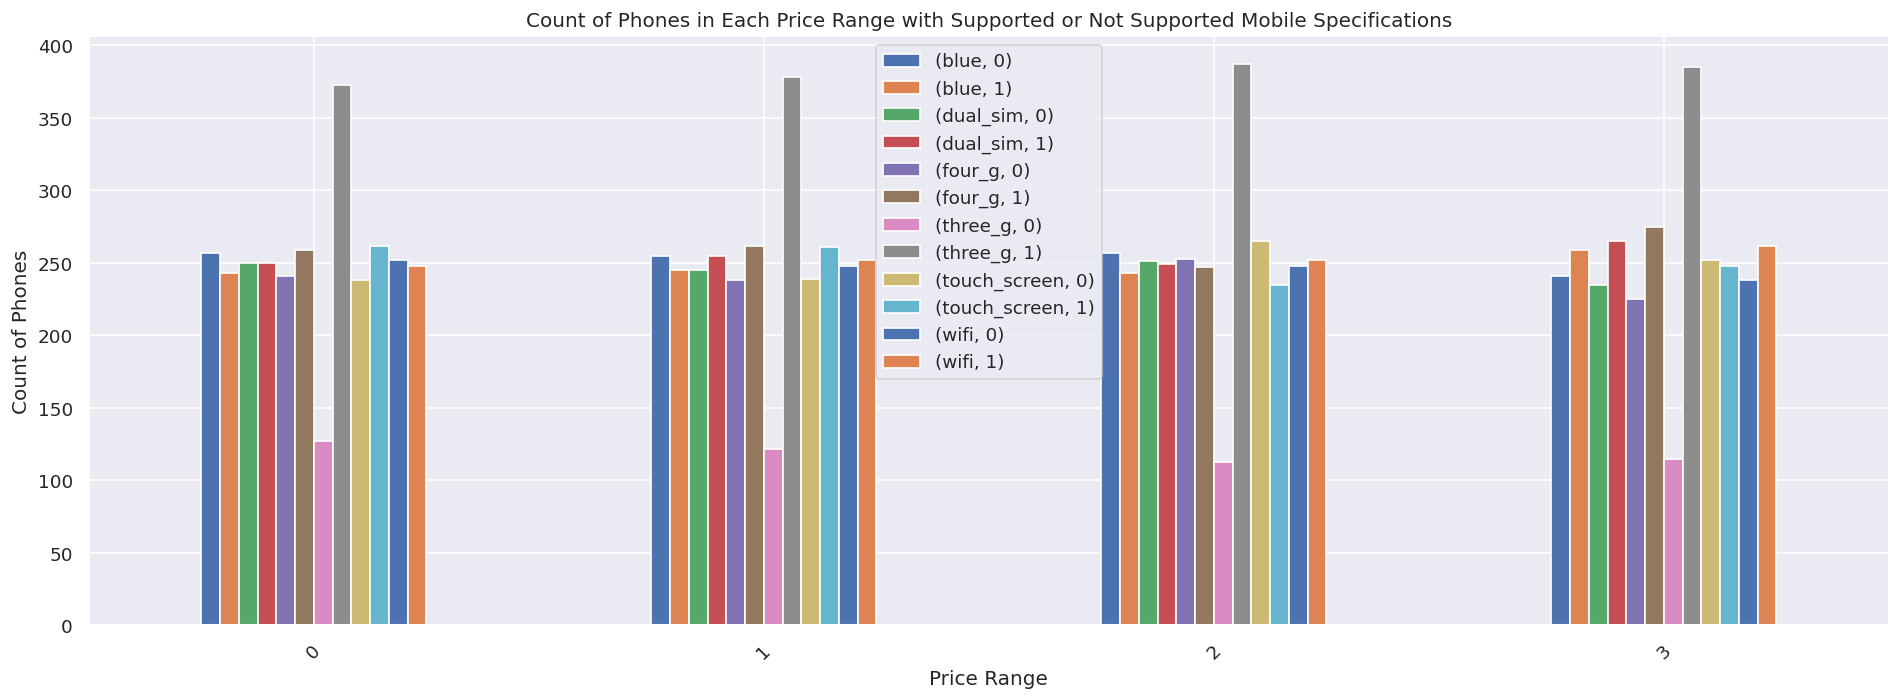

In [211]:
# Checking the counts of binary categorical variables by grouping price range.
group_by_price=df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

plt.figure(figsize=(12, 6))
group_by_price.plot.bar(figsize=(16,6))
plt.title('Count of Phones in Each Price Range with Supported or Not Supported Mobile Specifications')
plt.xlabel('Price Range')
plt.ylabel('Count of Phones')
plt.xticks(rotation=45)
plt.legend(loc='upper center')  # Set custom legend location
plt.tight_layout()  # Adjust spacing
plt.show()


* Why did you pick the specific chart?
1. To creates a grouped bar chart to visualize the counts for each price range and specification.

* What is/are the insight(s) found from the chart?
1. We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.

#### Chart - 5

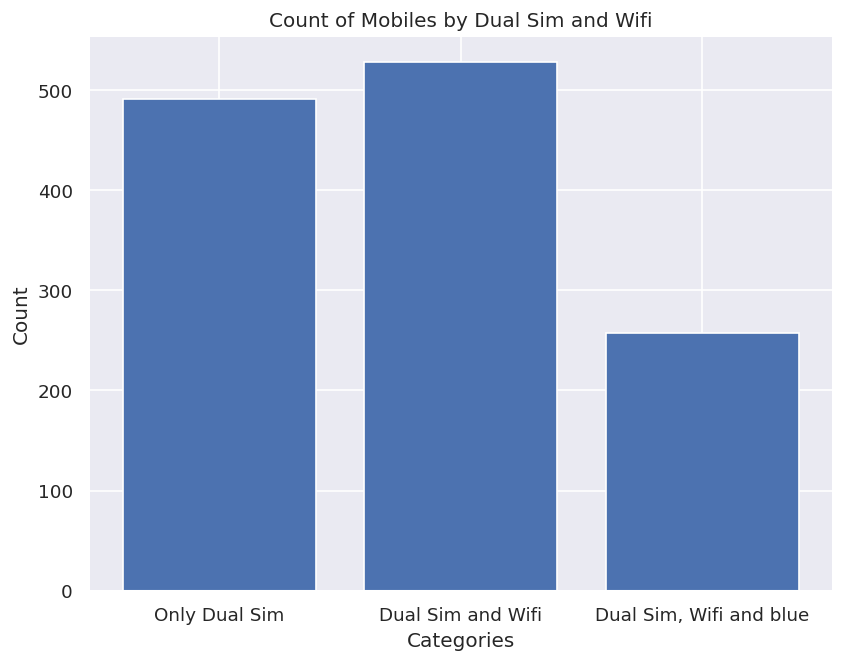

In [212]:
# Count the number of mobiles with only dual_sim and both dual_sim and wifi
only_dual_sim = df[(df['dual_sim'] == 1) & (df['wifi'] == 0)].shape[0]
dual_sim_and_wifi = df[(df['dual_sim'] == 1) & (df['wifi'] == 1)].shape[0]
dual_sim_and_wifi_with_blue = df[(df['dual_sim'] == 1) & (df['wifi'] == 1) &(df['blue'] == 1)].shape[0]

# Create a bar chart
labels = ['Only Dual Sim', 'Dual Sim and Wifi', 'Dual Sim, Wifi and blue']
values = [only_dual_sim, dual_sim_and_wifi, dual_sim_and_wifi_with_blue]
plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Mobiles by Dual Sim and Wifi')

# Display the plot
plt.show()


* Why did you pick the specific chart?
1. Count the number of mobiles with only dual_sim and both dual_sim and wifi

* What is/are the insight(s) found from the chart?
1. Mobiles with only dual_sim: 497
2. Mobiles with both dual_sim and blue: 522
3. Mobile with dual_sim and blue as well as wifi : 257

#### Chart - 6

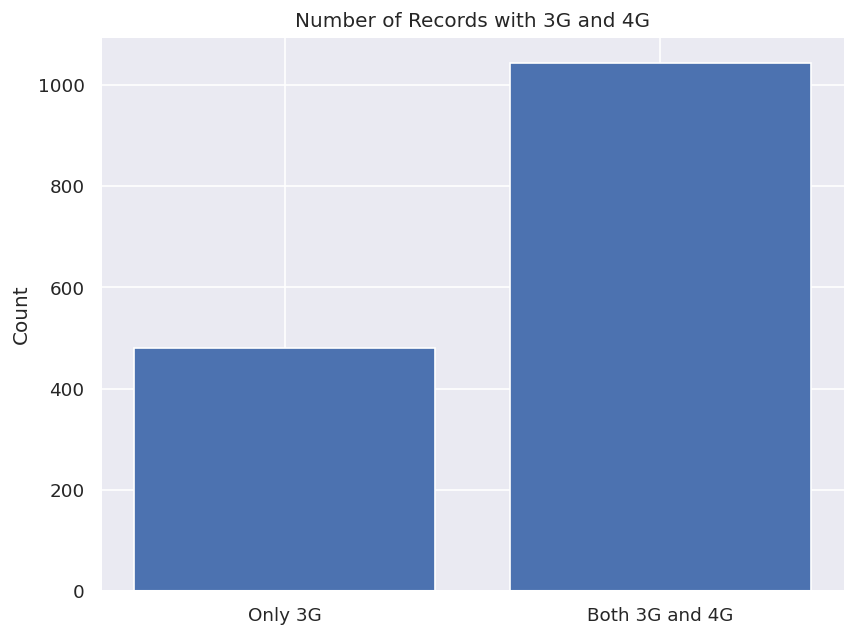

In [213]:
# Count the number of rows with only three_g and both three_g and four_g
only_three_g = df[(df['three_g'] == 1) & (df['four_g'] == 0)].shape[0]
both_three_g_four_g = df[(df['three_g'] == 1) & (df['four_g'] == 1)].shape[0]

# Create a bar plot
labels = ['Only 3G', 'Both 3G and 4G']
values = [only_three_g, both_three_g_four_g]
plt.bar(labels, values)

# Set the title of the plot
plt.title('Number of Records with 3G and 4G')

# Set the y-axis label
plt.ylabel('Count')

# Display the plot
plt.show()


* What is/are the insight(s) found from the chart?
1. There are 480 mobile phones who support only 3G
2. There are 1043 mobile phones who support both 3G and 4G

#### Chart - 7 - Correlation Heatmap

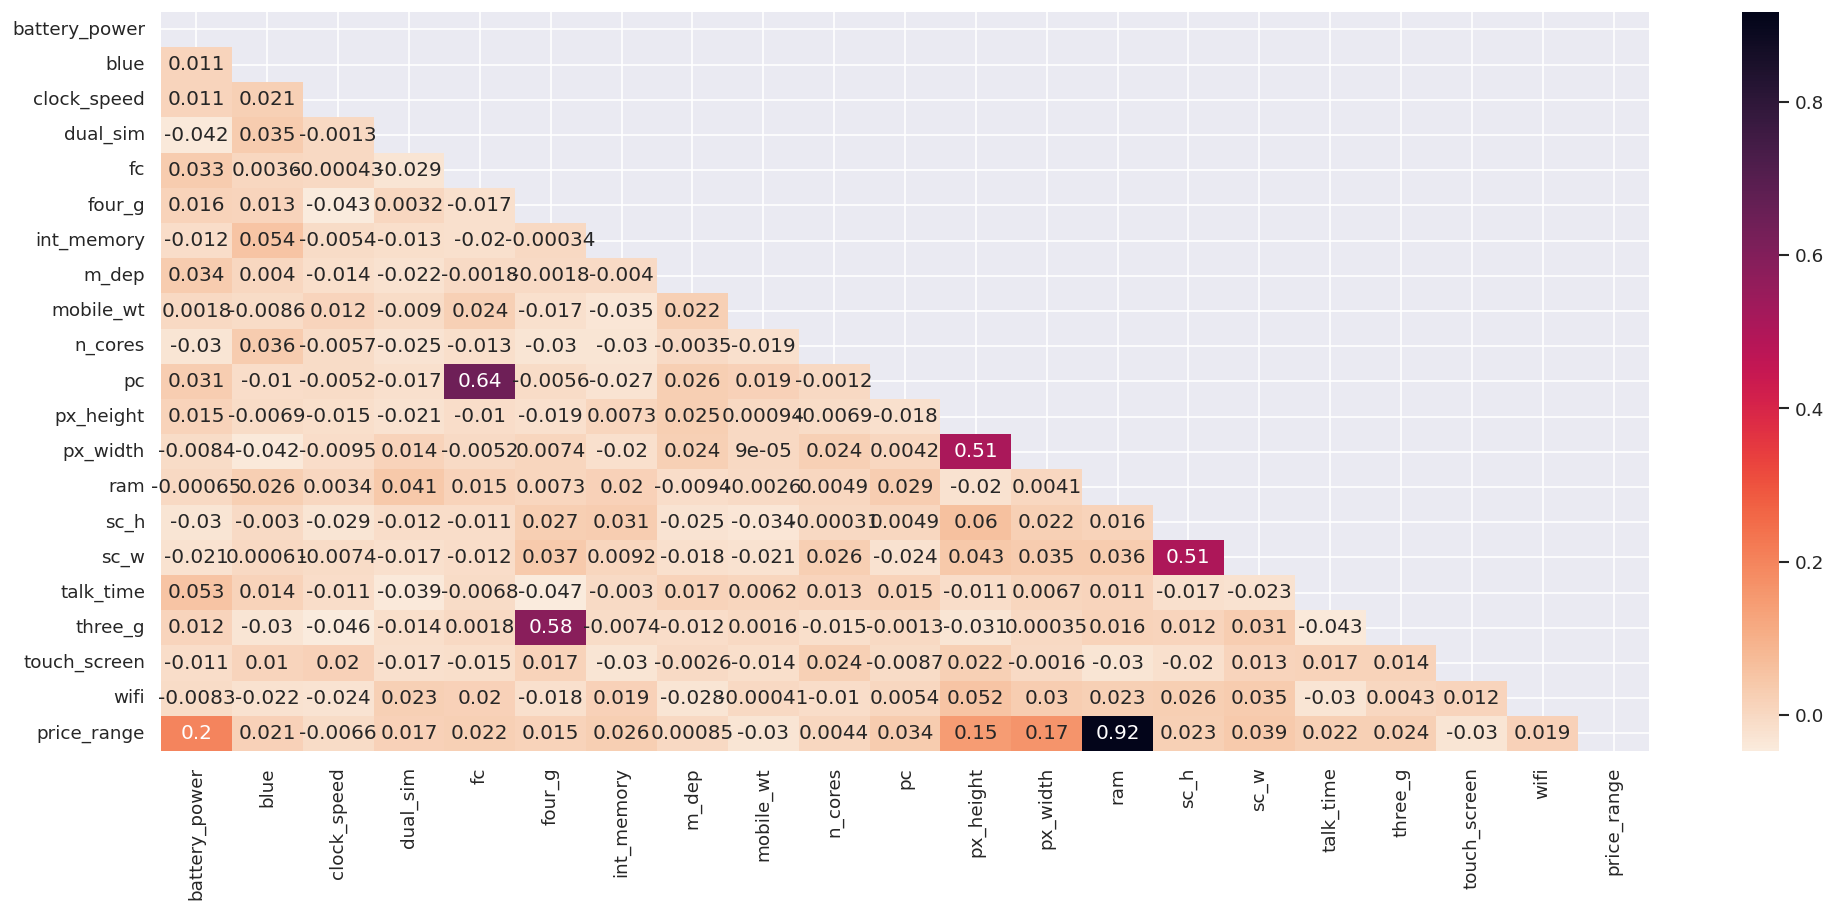

In [214]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20, 8))
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, cmap='rocket_r')
plt.show()


* Why did you pick the specific chart?
1. To display the strength and direction of the relationship between two or more variable.

### Chart - 8

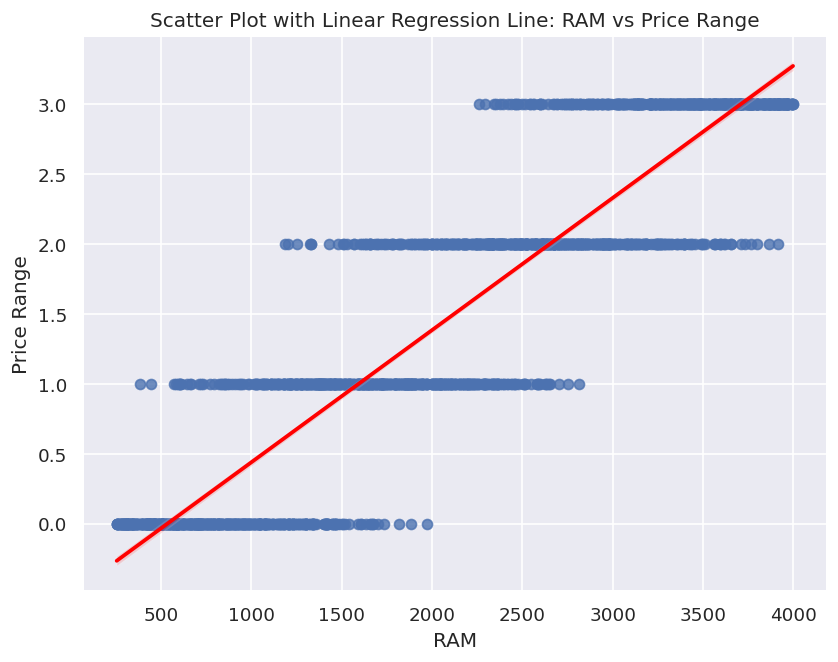

In [215]:
# Let's creates a scatter plot showing the relationship between RAM and price range, with a linear regression line.

x = df['ram']
y = df['price_range']

# Create a scatter plot with a linear regression line
sns.regplot(x=x, y=y, line_kws={"color": "red"})

plt.xlabel('RAM')

# Set the y-axis label
plt.ylabel('Price Range')

# Set the title of the plot
plt.title('Scatter Plot with Linear Regression Line: RAM vs Price Range')

# Display the plot
plt.show()


* Why did you pick the specific chart?
1. We use a scatter plot with a linear regression line to visualize the relationship between two variables

* What is/are the insight(s) found from the chart?
1. I found that ram is heighly correlated with price range

### Chart - 9

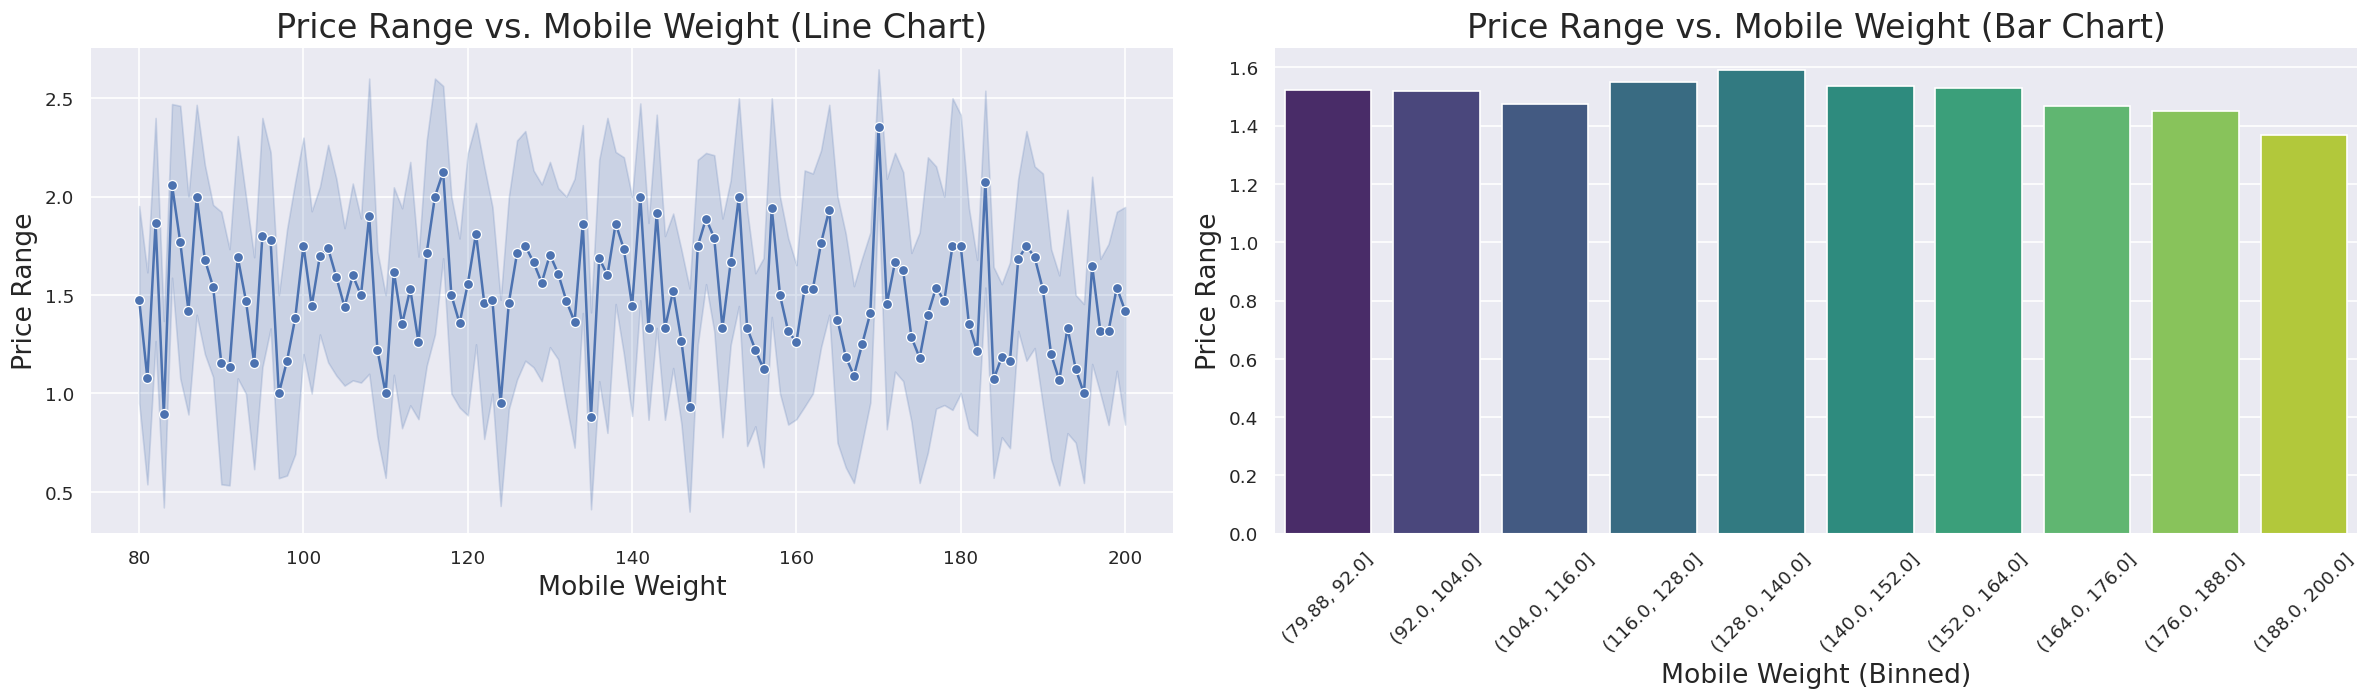

In [216]:
# Let's Plot Line and barchart Price Rang vs Mobile Weight.

price_range_column = 'price_range'
mobile_wt_column = 'mobile_wt'

# Create bins for 'mobile_wt' column
num_bins = 10
df['mobile_wt_bins'] = pd.cut(df[mobile_wt_column], bins=num_bins)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Line chart on the left side
sns.lineplot(x=mobile_wt_column, y=price_range_column, data=df, marker='o', color='b', ax=ax1)

# Add labels and title to the left subplot
ax1.set_title('Price Range vs. Mobile Weight (Line Chart)', size=20)
ax1.set_xlabel('Mobile Weight', size=16)
ax1.set_ylabel('Price Range', size=16)

# Bar chart on the right side
sns.barplot(x='mobile_wt_bins', y=price_range_column, data=df, ci=None, palette='viridis', ax=ax2)

# Add labels and title to the right subplot
ax2.set_title('Price Range vs. Mobile Weight (Bar Chart)', size=20)
ax2.set_xlabel('Mobile Weight (Binned)', size=16)
ax2.set_ylabel('Price Range', size=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


* Why did you pick the specific chart?
1. Bar chart and line chart great combination in order to understand any continuous feature

* What is/are the insight(s) found from the chart?
1. Most of the light Weight mobiles are in Highest Price Rang

#### Chart - 10 - Pair Plot

In [217]:
# Pair Plot visualization code
# sns.pairplot(df, hue="price_range")

* Why did you pick the specific chart?
1. Pair plot is used for visualizing the relationships between multiple pairs of variables in a dataset.

* What is/are the insight(s) found from the chart?
1. Ram is almost corelated with every feature among the all features.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [218]:
# Handling Missing Values & Missing Value Imputation
# No Missing values in dataset

### 2. Handling Outliers

In [219]:
# Handling Outliers & Outlier treatments
#There is no outliers in this dataset.

### 3. Categorical Encoding

In [220]:
# There is no need to do categorical encoding

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [221]:
# Creating the 'resolution' feature by multiplying 'px_height' and 'px_width' columns.

df['resolution']= df['px_height'] * df['px_width']

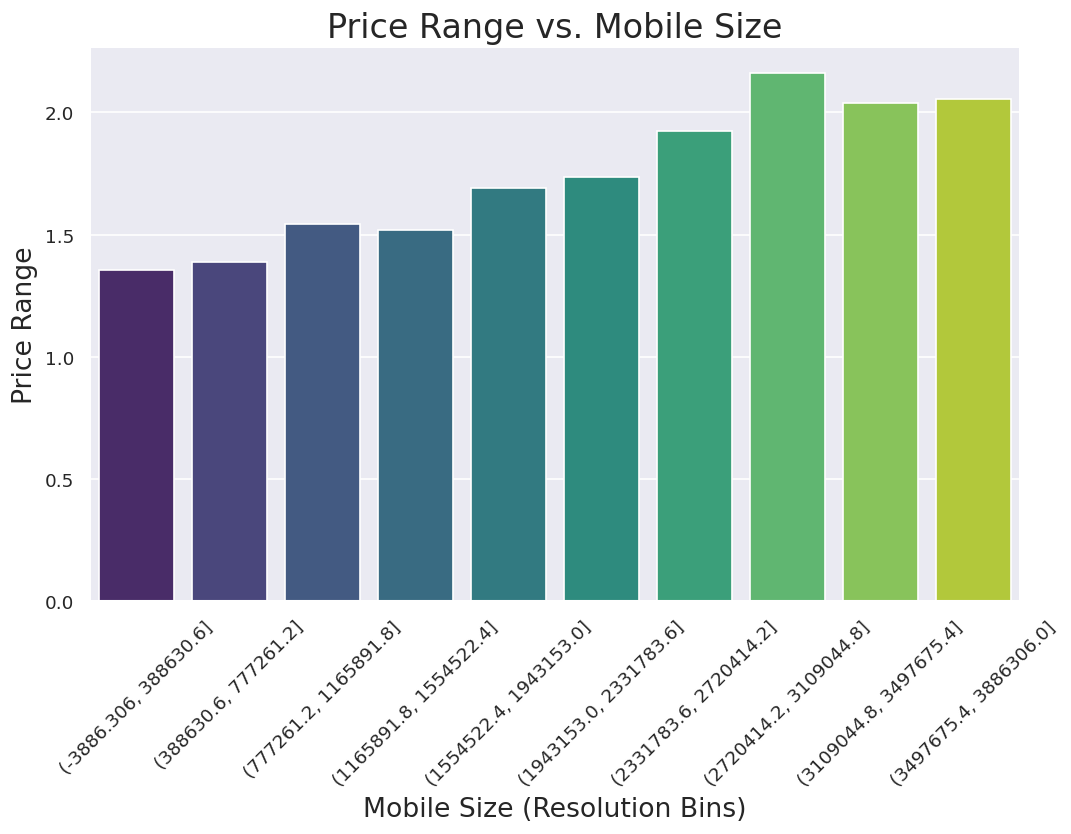

In [222]:

price_range_column = 'price_range'
resolution_column = 'resolution'

# Create bins for 'resolution' column
num_bins = 10
df['resolution_bins'] = pd.cut(df[resolution_column], bins=num_bins)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='resolution_bins', y=price_range_column, data=df, ci=None, palette='viridis')

# Add labels and title
plt.title('Price Range vs. Mobile Size', size=20)
plt.xlabel('Mobile Size (Resolution Bins)', size=16)
plt.ylabel('Price Range', size=16)

plt.xticks(rotation=45)
plt.show()


* Why did you pick the specific chart?
1. To Comparing mobile size value count distrubution with Price Range.

* What is/are the insight(s) found from the chart?
1. After conducting a thorough analysis of the graph, it has been observed that there exists a linear correlation between resolution and price range.

In [223]:
# Creating the 'size' feature by multiplying 'sc_h' and 'sc_w' columns.

df['size']= df['sc_h'] * df['sc_w']

In [224]:
# Filtering the DataFrame to remove rows where 'resolution' or 'size' is equal to zero.

df = df.loc[(df['resolution'] != 0) & (df['size'] != 0)]

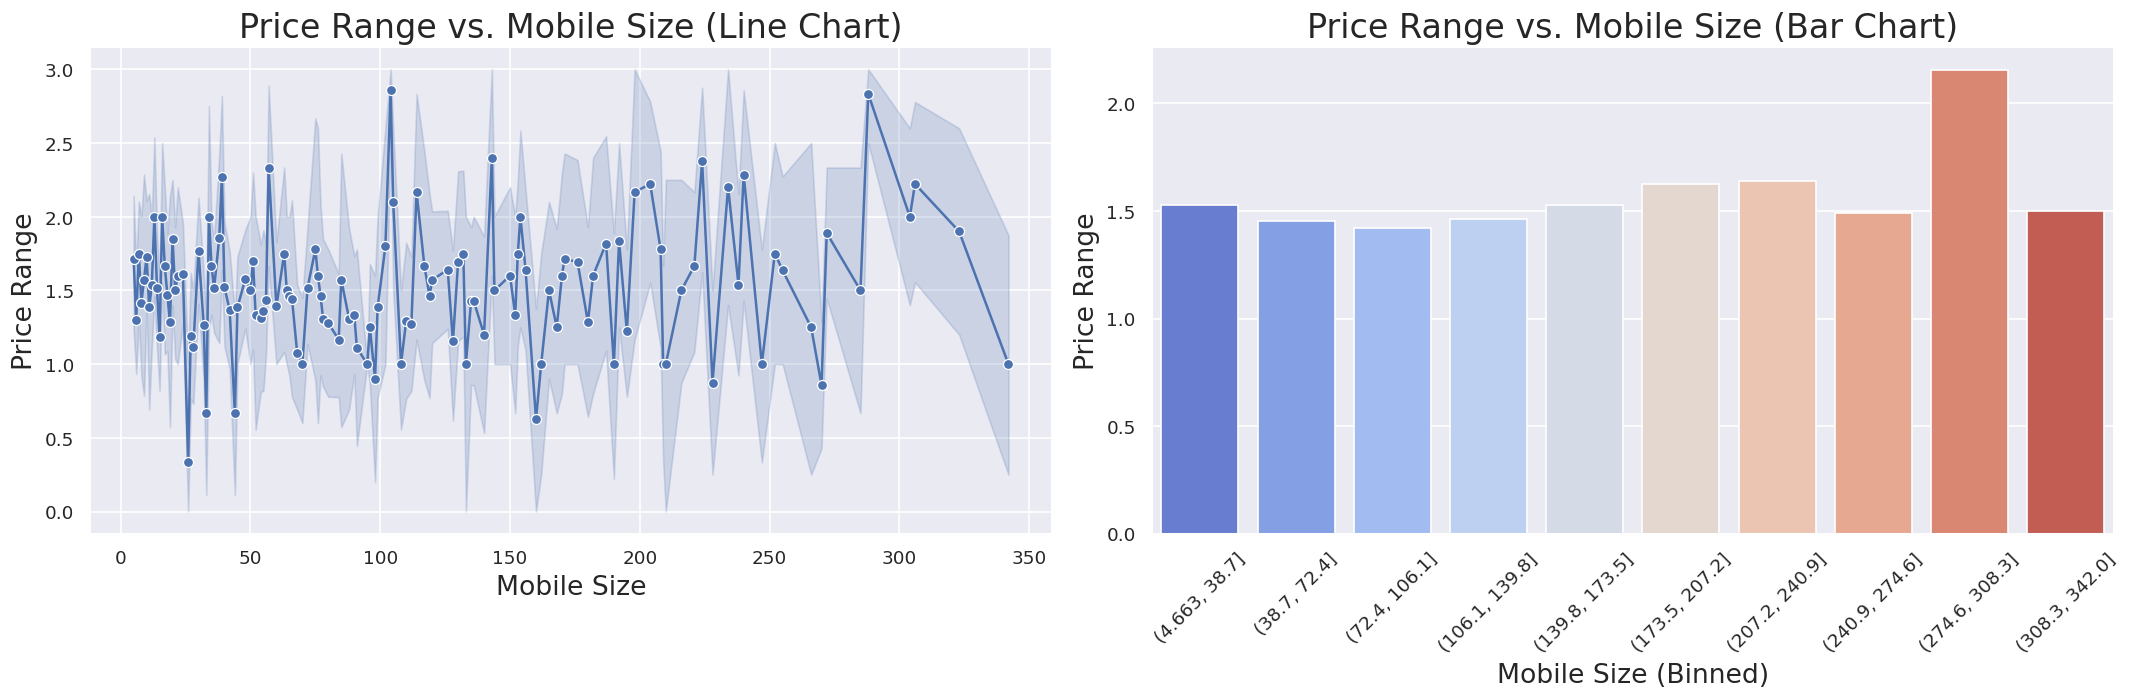

In [225]:

price_range_column = 'price_range'
size_column = 'size'

# Create bins for 'size' column
num_bins = 10
df['size_bins'] = pd.cut(df[size_column], bins=num_bins)

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Line chart
sns.lineplot(x=size_column, y=price_range_column, data=df, marker='o', color='b', ax=ax1)

# Add labels and title to the first subplot
ax1.set_title('Price Range vs. Mobile Size (Line Chart)', size=20)
ax1.set_xlabel('Mobile Size', size=16)
ax1.set_ylabel('Price Range', size=16)

# Bar chart
sns.barplot(x='size_bins', y=price_range_column, data=df, ci=None, palette='coolwarm', ax=ax2)

# Add labels and title to the second subplot
ax2.set_title('Price Range vs. Mobile Size (Bar Chart)', size=20)
ax2.set_xlabel('Mobile Size (Binned)', size=16)
ax2.set_ylabel('Price Range', size=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


* Why did you pick the specific chart?
1. The combination of Bar chart and Line chart it helpful to graps clear insights for continuous featues.

* What is/are the insight(s) found from the chart?
1. Graph reveals a positive correlation between mobile size and price range, where larger-sized mobiles tend to have higher prices and small size of mobile also belongs to high price range
2. Average-sized mobiles predominantly belong to lower price ranges.

In [226]:
# Create a new variable 'MobileConnectivity' based on '3G' and '4G' variables
df['MobileConnectivity'] = 0
df.loc[(df['three_g'] == 0) & (df['four_g'] == 0), 'MobileConnectivity'] = 0
df.loc[(df['three_g'] == 1) & (df['four_g'] == 0), 'MobileConnectivity'] = 1
df.loc[(df['three_g'] == 1) & (df['four_g'] == 1), 'MobileConnectivity'] = 2


In [227]:
# Calculate the percentage of each MobileConnectivity category
percentage_only_3G = len(df[df.MobileConnectivity == 0]) / len(df) * 100
percentage_only_4G = len(df[df.MobileConnectivity == 1]) / len(df) * 100
percentage_both_3G_4G = len(df[df.MobileConnectivity == 2]) / len(df) * 100

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=['Only 3G', 'Only 4G', 'Both 3G and 4G'],
    values=[percentage_only_3G, percentage_only_4G, percentage_both_3G_4G],
    hole=0.5,
    textinfo='percent',
    marker=dict(colors=['#ff9500', '#007bff', '#34c759'])
)])

# Set the title and legend color
title_color = '#8a8d93'
legend_color = 'white'

fig.update_layout(
    title='Mobile Connectivity',
    title_font=dict(size=25, color=title_color, family="Lato, sans-serif"),
    plot_bgcolor='#444',
    paper_bgcolor='#444',
    legend=dict(
        bgcolor='rgba(0,0,0,0)',  # Set the legend background color to transparent
        font=dict(color=legend_color),
        title=dict(text='Connectivity', font=dict(color=legend_color))
    )
)

# Display the chart
fig.show(renderer='colab')


* Why did you pick the specific chart?
1. To check the see the percentage of each MobileConnectivity category

* What is/are the insight(s) found from the chart?
1. There are 954 mobiles who support both 4G and 3G
2. There are 435 mobiles who support only 4G
3. There are 430 mobiles who support only 3G

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   battery_power       1819 non-null   int64   
 1   blue                1819 non-null   int64   
 2   clock_speed         1819 non-null   float64 
 3   dual_sim            1819 non-null   int64   
 4   fc                  1819 non-null   int64   
 5   four_g              1819 non-null   int64   
 6   int_memory          1819 non-null   int64   
 7   m_dep               1819 non-null   float64 
 8   mobile_wt           1819 non-null   int64   
 9   n_cores             1819 non-null   int64   
 10  pc                  1819 non-null   int64   
 11  px_height           1819 non-null   int64   
 12  px_width            1819 non-null   int64   
 13  ram                 1819 non-null   int64   
 14  sc_h                1819 non-null   int64   
 15  sc_w                1819 non-null   in

In [229]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'mobile_wt_bins', 'resolution',
       'resolution_bins', 'size', 'size_bins', 'MobileConnectivity'],
      dtype='object')

#### 2. Feature Selection

In [230]:
df.drop(['px_height','px_width','sc_h','sc_w','three_g','four_g','mobile_wt_bins','resolution_bins','size_bins'], axis=1, inplace=True)

<Axes: >

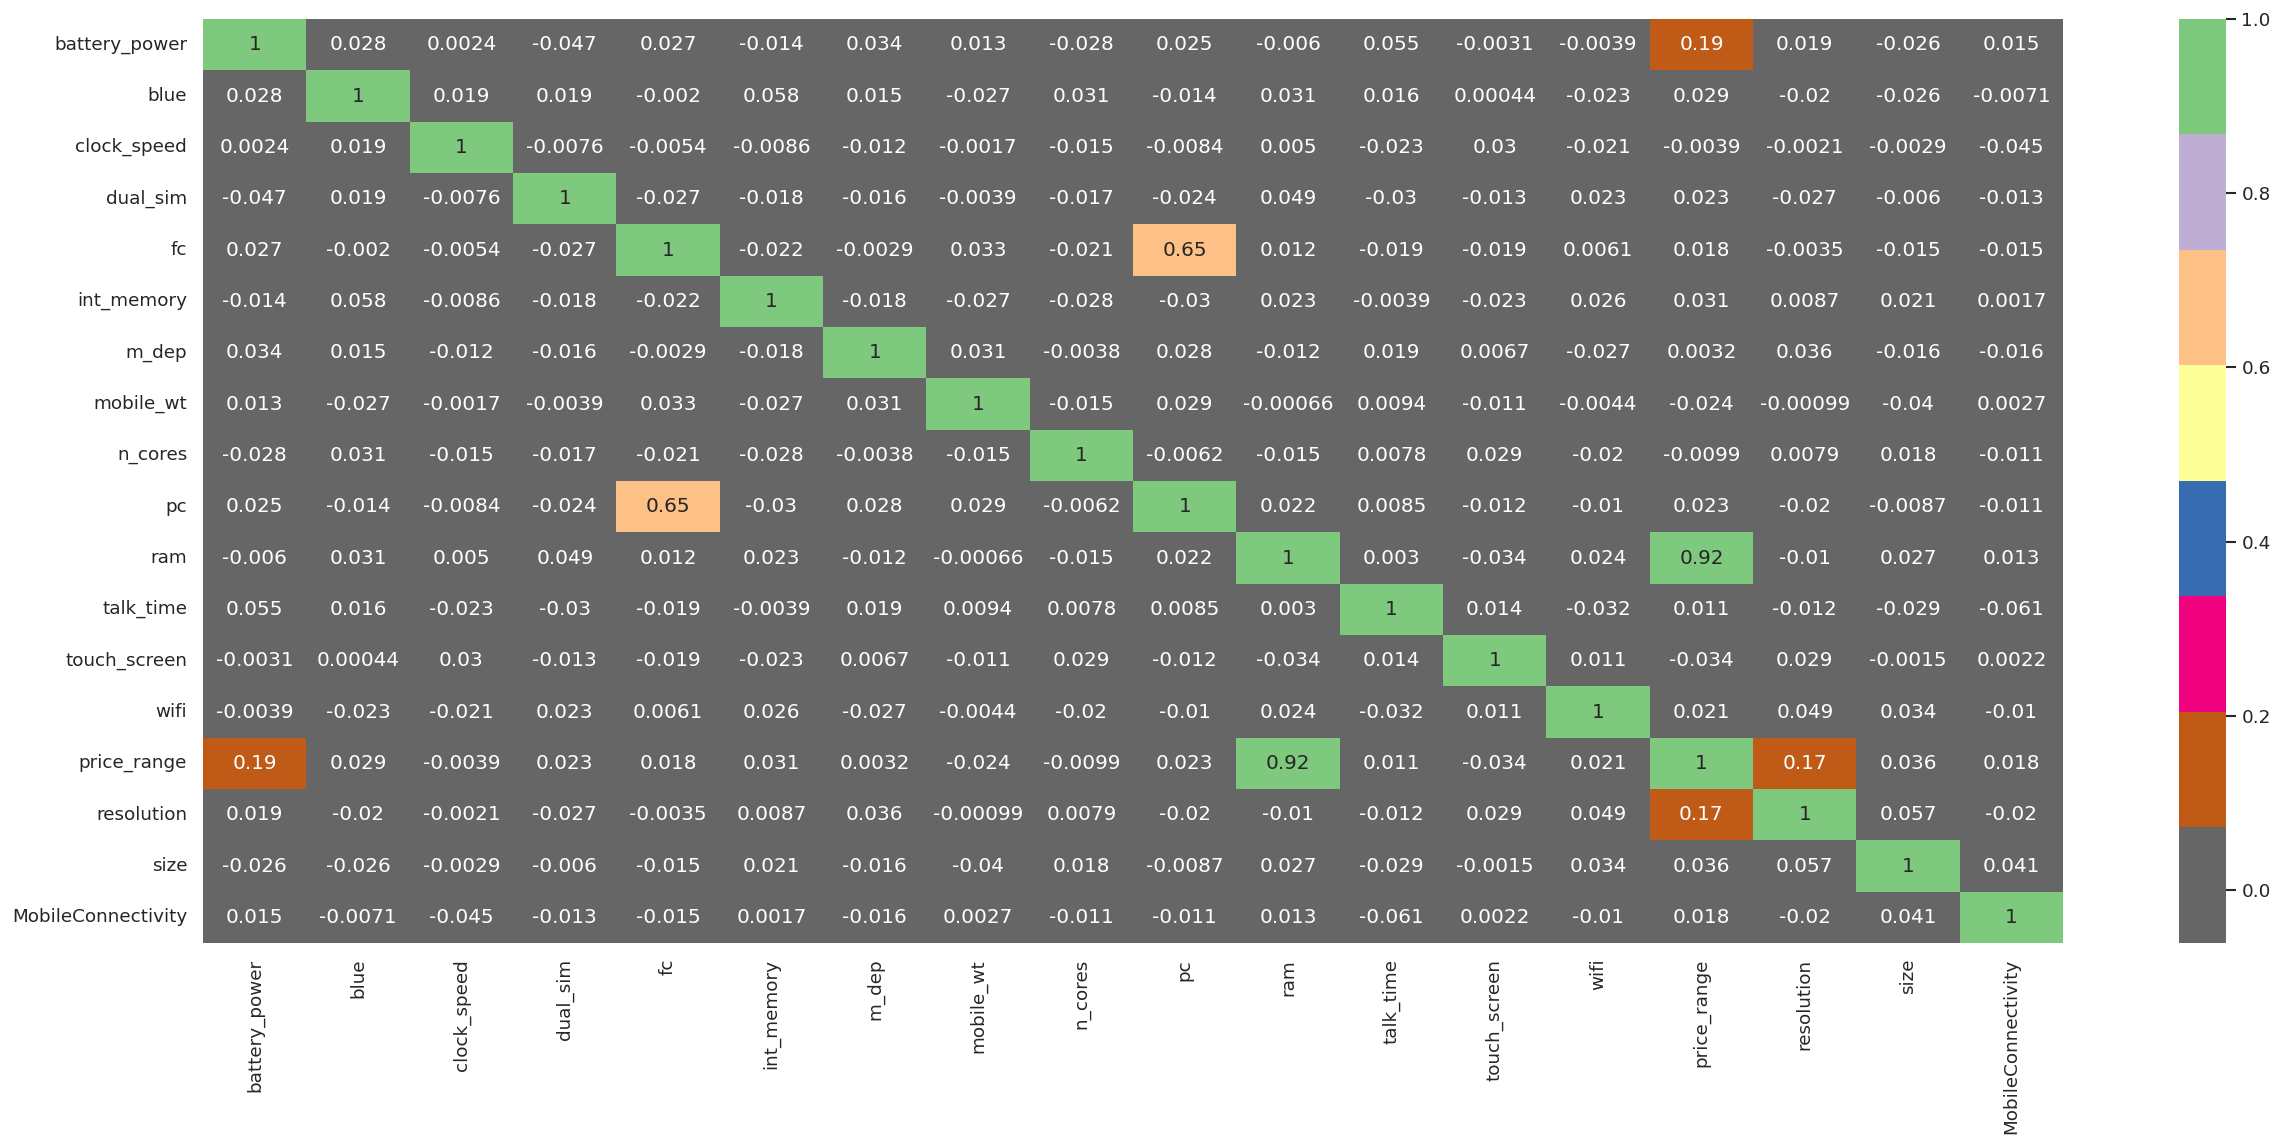

In [231]:
corr=df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

* What all feature selection methods have you used  and why?
1. After deleting some feature who were creating multicollinearity problem, it was important so see the relation of each feature with every feature

##### Which all features you found important and why?
1. The most important features in this dataset for fitting the model are RAM, battery power, and resolution column.






In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_power       1819 non-null   int64  
 1   blue                1819 non-null   int64  
 2   clock_speed         1819 non-null   float64
 3   dual_sim            1819 non-null   int64  
 4   fc                  1819 non-null   int64  
 5   int_memory          1819 non-null   int64  
 6   m_dep               1819 non-null   float64
 7   mobile_wt           1819 non-null   int64  
 8   n_cores             1819 non-null   int64  
 9   pc                  1819 non-null   int64  
 10  ram                 1819 non-null   int64  
 11  talk_time           1819 non-null   int64  
 12  touch_screen        1819 non-null   int64  
 13  wifi                1819 non-null   int64  
 14  price_range         1819 non-null   int64  
 15  resolution          1819 non-null   int64  
 16  size  

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [233]:
# Let's categories the right and left skew features.
# Calculate skewness of each feature
from scipy.stats import skew
skewness = df.apply(skew)

# Define the threshold for acceptable skewness
threshold = 0.5

# Initialize lists for different types of skewness
left_skew_columns = []
right_skew_columns = []
acceptable_skew_columns = []

# Check skewness of each feature
for column in skewness.index:
    if abs(skewness[column]) > threshold:
        if skewness[column] < 0:
            left_skew_columns.append(column)
        else:
            right_skew_columns.append(column)
    else:
        acceptable_skew_columns.append(column)

# Print the results
print("Columns with left skew:")
for column in left_skew_columns:
    print(f"Feature '{column}' is left-skewed with skewness {skewness[column]:.2f}")

print("\nColumns with right skew:")
for column in right_skew_columns:
    print(f"Feature '{column}' is right-skewed with skewness {skewness[column]:.2f}")

print("\nColumns with acceptable skewness:")
for column in acceptable_skew_columns:
    print(f"Feature '{column}' has acceptable skewness")


Columns with left skew:
Feature 'MobileConnectivity' is left-skewed with skewness -0.57

Columns with right skew:
Feature 'fc' is right-skewed with skewness 1.03
Feature 'resolution' is right-skewed with skewness 1.22
Feature 'size' is right-skewed with skewness 1.12

Columns with acceptable skewness:
Feature 'battery_power' has acceptable skewness
Feature 'blue' has acceptable skewness
Feature 'clock_speed' has acceptable skewness
Feature 'dual_sim' has acceptable skewness
Feature 'int_memory' has acceptable skewness
Feature 'm_dep' has acceptable skewness
Feature 'mobile_wt' has acceptable skewness
Feature 'n_cores' has acceptable skewness
Feature 'pc' has acceptable skewness
Feature 'ram' has acceptable skewness
Feature 'talk_time' has acceptable skewness
Feature 'touch_screen' has acceptable skewness
Feature 'wifi' has acceptable skewness
Feature 'price_range' has acceptable skewness


In [234]:
# Let's apply square root column transformation to all right skew column
for column in right_skew_columns:
  df[column]=np.sqrt(df[column])

In [235]:
# Apply Yeo-Johnson transformation to 'MobileConnectivity' column

from scipy.stats import yeojohnson

df['MobileConnectivity'], _ = yeojohnson(df['MobileConnectivity'])

In [236]:

skewness_dict = {column: skew(df[column]) for column in df.columns}

# Print the skewness values for each column
for column, skewness in skewness_dict.items():
    print(f"Skewness of {column}: {skewness}")


Skewness of battery_power: 0.030189554023467065
Skewness of blue: -0.014293932941290171
Skewness of clock_speed: 0.1792130956265254
Skewness of dual_sim: -0.018692405136401243
Skewness of fc: 0.01810976295812797
Skewness of int_memory: 0.47211720539323054
Skewness of m_dep: 0.09969746340269299
Skewness of mobile_wt: -0.015635417720462404
Skewness of n_cores: -0.006623029028098489
Skewness of pc: 0.028336842589600942
Skewness of ram: -0.006710274985703499
Skewness of talk_time: 0.014566327477334148
Skewness of touch_screen: -0.02968991189422145
Skewness of wifi: -0.05389531400616191
Skewness of price_range: -0.01230907978121567
Skewness of resolution: 0.4480380039540807
Skewness of size: 0.41323547473674876
Skewness of MobileConnectivity: -0.427242738595858


### 3. Data Transformation

In [237]:
# Transform Your data
# creating the set of dependent and independent variables
X = df.drop(labels='price_range', axis=1)
Y = df['price_range']

# print the shape of X and Y
print(f"The Number of Rows and Columns in X is {X.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {Y.shape} respectively.")

The Number of Rows and Columns in X is (1819, 17) respectively.
The Number of Rows and Columns in Y is (1819,) respectively.


### 4. Data Scaling

In [238]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

I used Feature scaling method to normalize the range of independent variables or features of data.

### 5. Data Splitting

In [239]:
# Split your data to train and test. Choose Splitting ratio wisely.
#importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 42)

In [240]:
# Getting the shape of Train Test set.

print("Training Dataset Shape:--")
print("X_train shape ", X_train.shape)
print("Y_train shape ", Y_train.shape)
print("Testing Dataset Shape:--")
print("X_test shape ",X_test.shape)
print("Y_test shape ",Y_test.shape)

Training Dataset Shape:--
X_train shape  (1455, 17)
Y_train shape  (1455,)
Testing Dataset Shape:--
X_test shape  (364, 17)
Y_test shape  (364,)


##### What data splitting ratio have you used and why?

When dealing with a moderate amount of data, an 80:20 split (80% training and 20% testing) is a common choice. This division allows for a sufficient amount of data to train a model while still reserving a portion for evaluation. However, if the dataset is too small to provide satisfactory variance in the results, cross-validation may be necessary. On the other hand, if the dataset is extremely large, the specific split ratio becomes less critical. In such cases, using less training data can be considered to reduce computational requirements.

### 6. Handling Imbalanced Dataset

In [241]:
price_range_values=df['price_range'].value_counts()
price_range_values

3    461
2    456
1    451
0    451
Name: price_range, dtype: int64

<Axes: ylabel='price_range'>

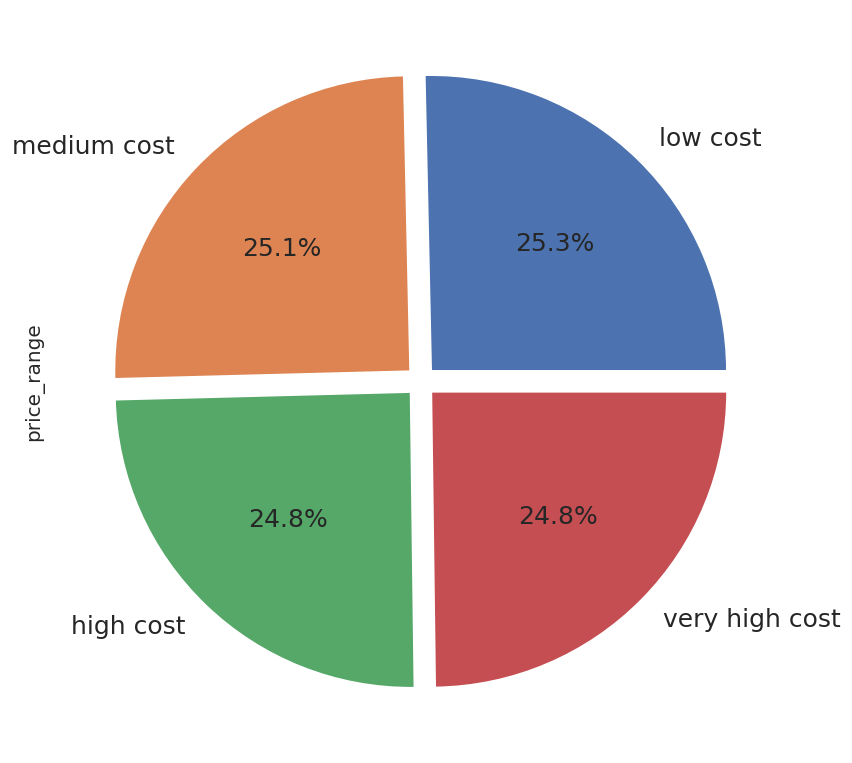

In [242]:
# Let's generates a pie chart visualizing the distribution of the price_range_values across different cost categories
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)

##### Do you think the dataset is imbalanced? Explain Why.

The target variable does not exhibit class imbalance as there is an approximately equal number of observations for each category.

In [243]:
# Handling Imbalanced Dataset (If needed)

#Not needed

### 7.Function For Confusion Matrix

In [244]:
# function for confusion matrix
def matrix(actual, predicted):
  labels = ['0','1','2','3']
  cm = confusion_matrix(actual, predicted)
  print(cm)

  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)

  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

## ***6. ML Model Implementation***

### ML Model No. 1---> **Logistic Regression**

In [245]:
# function for logistic regression
def logistic_regression(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)

  # transforming the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # build a logistic regression model
  log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
  log_reg.fit(X_train, Y_train)

  # get the predicted probabilities
  logistic_train_prob = log_reg.predict_proba(X_train)
  logistic_test_prob = log_reg.predict_proba(X_test)

  # get the predicted classes
  logistic_train_class = log_reg.predict(X_train)
  logistic_test_class = log_reg.predict(X_test)

  # calculating accuracy on train and test set
  logistic_train_acc = accuracy_score(Y_train, logistic_train_class)
  logistic_test_acc = accuracy_score(Y_test, logistic_test_class)

  print("\n")
  print("The accuracy on train dataset is", logistic_train_acc)
  print("The accuracy on test dataset is", logistic_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  log_precision = precision_score(Y_test, logistic_test_class, average='weighted')
  print("The precision on test dataset is", log_precision)

  log_recall = recall_score(Y_test, logistic_test_class, average='weighted')
  print("The recall on test dataset is", log_recall)

  # calculating roc_auc_score on the test set
  log_roc = roc_auc_score(Y_test, logistic_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", log_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, logistic_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n")
  print("Confusion matrix for test set:")
  matrix(Y_test, logistic_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, logistic_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': logistic_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  return logistic_test_acc, log_precision, log_recall, log_roc

The shape of training set is (1455, 17) (1455,)
The shape of testing set is (364, 17) (364,)


The accuracy on train dataset is 0.9505154639175257
The accuracy on test dataset is 0.9478021978021978


The precision on test dataset is 0.9474496735043489
The recall on test dataset is 0.9478021978021978
The roc auc score on test dataset is 0.9944503215259112


Confusion matrix for train set:
[[343   9   0   0]
 [ 12 331  14   0]
 [  0  12 342  14]
 [  0   0  11 367]]


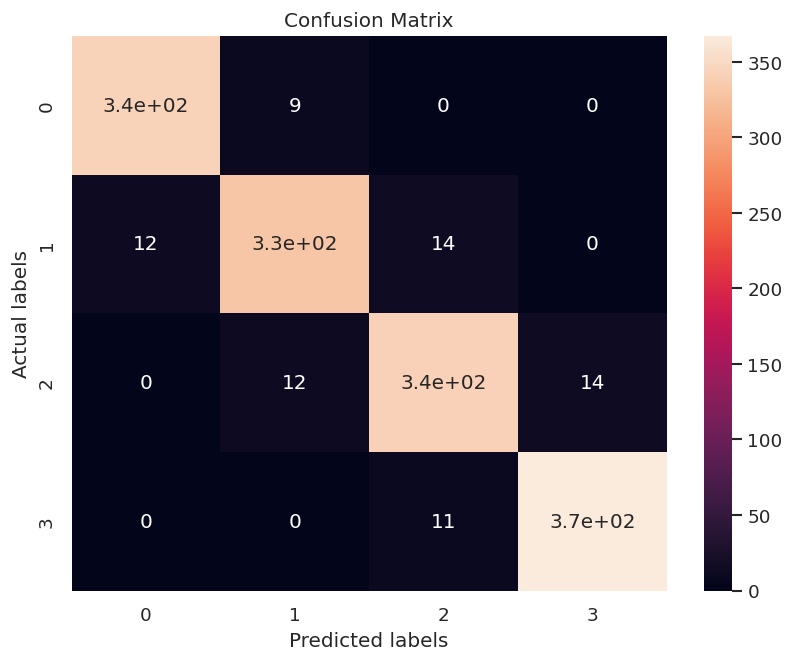

<Figure size 960x720 with 0 Axes>



Confusion matrix for test set:
[[99  0  0  0]
 [ 3 88  3  0]
 [ 0  5 79  4]
 [ 0  0  4 79]]


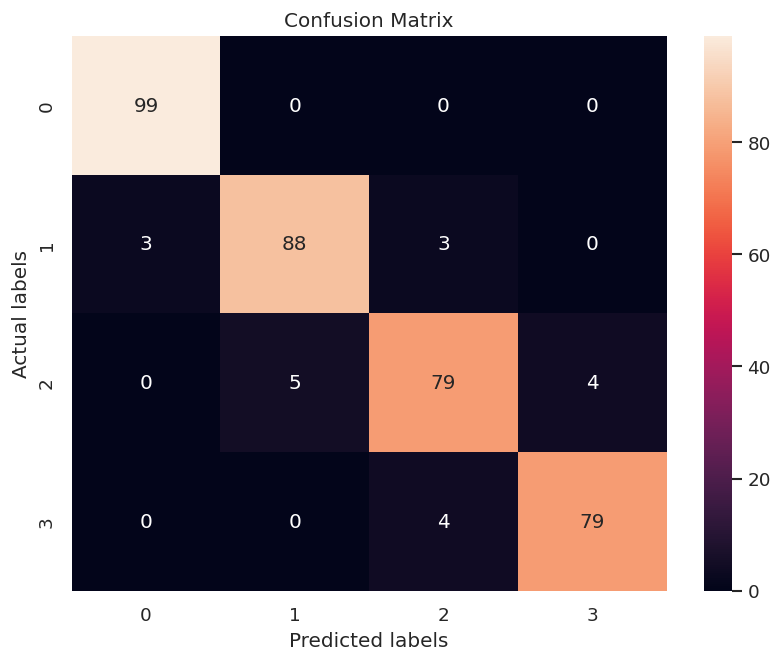

<Figure size 960x720 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       0.95      0.94      0.94        94
           2       0.92      0.90      0.91        88
           3       0.95      0.95      0.95        83

    accuracy                           0.95       364
   macro avg       0.95      0.95      0.95       364
weighted avg       0.95      0.95      0.95       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                3
558              2                2
453              0                0
683              2                2


In [246]:
# Running the Model
lr = logistic_regression(X,Y)

In [247]:
# Let's  store the metrics of logistic regression
log_acc = lr[0]
log_precision = lr[1]
log_recall = lr[2]
log_roc = lr[3]

In [248]:
from sklearn.svm import SVC

def svm_classification(X, Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)

  # transforming the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # build an SVM model
  svm_model = SVC(kernel='linear', probability=True)
  svm_model.fit(X_train, Y_train)

  # get the predicted probabilities
  svm_train_prob = svm_model.predict_proba(X_train)
  svm_test_prob = svm_model.predict_proba(X_test)

  # get the predicted classes
  svm_train_class = svm_model.predict(X_train)
  svm_test_class = svm_model.predict(X_test)

  # calculating accuracy on train and test set
  svm_train_acc = accuracy_score(Y_train, svm_train_class)
  svm_test_acc = accuracy_score(Y_test, svm_test_class)

  print("\n")
  print("The accuracy on train dataset is", svm_train_acc)
  print("The accuracy on test dataset is", svm_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  svm_precision = precision_score(Y_test, svm_test_class, average='weighted')
  print("The precision on test dataset is", svm_precision)

  svm_recall = recall_score(Y_test, svm_test_class, average='weighted')
  print("The recall on test dataset is", svm_recall)

  # calculating roc_auc_score on the test set
  svm_roc = roc_auc_score(Y_test, svm_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", svm_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, svm_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n")
  print("Confusion matrix for test set:")
  matrix(Y_test, svm_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, svm_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': svm_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  return svm_test_acc, svm_precision, svm_recall, svm_roc


The shape of training set is (1455, 17) (1455,)
The shape of testing set is (364, 17) (364,)


The accuracy on train dataset is 0.9512027491408934
The accuracy on test dataset is 0.9560439560439561


The precision on test dataset is 0.9559682676342168
The recall on test dataset is 0.9560439560439561
The roc auc score on test dataset is 0.9946495593685417


Confusion matrix for train set:
[[338  14   0   0]
 [ 10 336  11   0]
 [  0  11 346  11]
 [  0   0  14 364]]


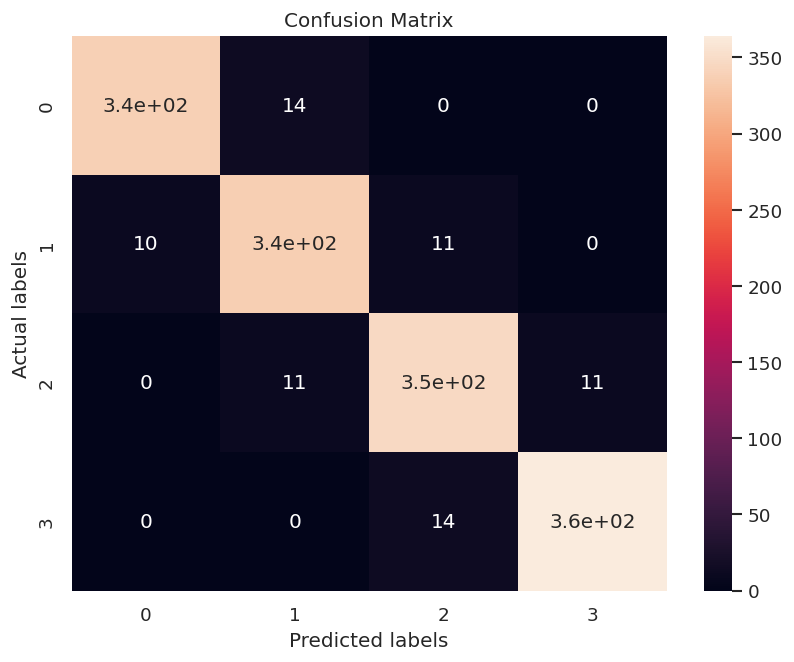

<Figure size 960x720 with 0 Axes>



Confusion matrix for test set:
[[98  1  0  0]
 [ 3 88  3  0]
 [ 0  3 82  3]
 [ 0  0  3 80]]


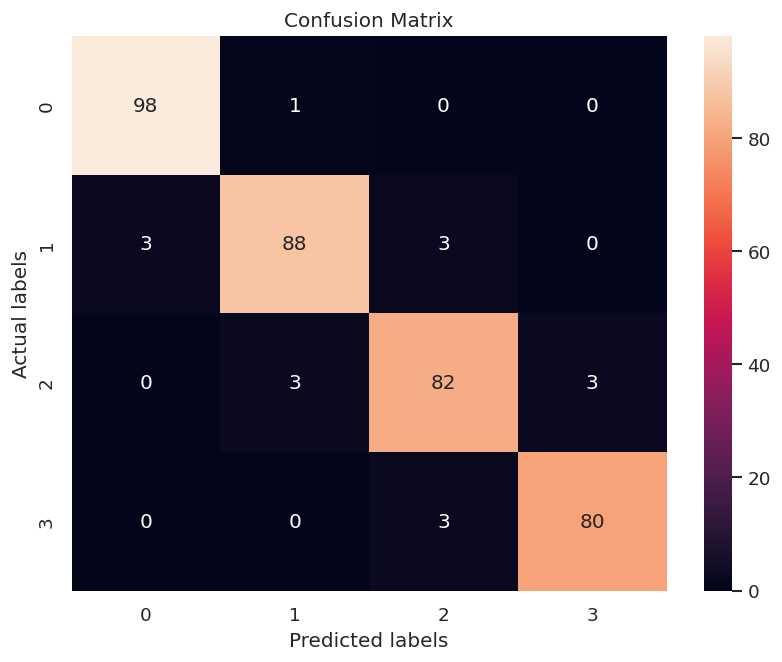

<Figure size 960x720 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        99
           1       0.96      0.94      0.95        94
           2       0.93      0.93      0.93        88
           3       0.96      0.96      0.96        83

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                3
558              2                2
453              0                0
683              2                2


In [249]:
sv=svm_classification(X, Y)

In [250]:
# Let's  store the metrics of logistic regression
sv_acc = sv[0]
sv_precision = sv[1]
sv_recall = sv[2]
sv_roc = sv[3]

In [251]:
def decision_tree_classification(X, Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)

  # transforming the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # build a decision tree model
  dt_model = DecisionTreeClassifier()
  dt_model.fit(X_train, Y_train)

  # get the predicted probabilities
  dt_train_prob = dt_model.predict_proba(X_train)
  dt_test_prob = dt_model.predict_proba(X_test)

  # get the predicted classes
  dt_train_class = dt_model.predict(X_train)
  dt_test_class = dt_model.predict(X_test)

  # calculating accuracy on train and test set
  dt_train_acc = accuracy_score(Y_train, dt_train_class)
  dt_test_acc = accuracy_score(Y_test, dt_test_class)

  print("\n")
  print("The accuracy on train dataset is", dt_train_acc)
  print("The accuracy on test dataset is", dt_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  dt_precision = precision_score(Y_test, dt_test_class, average='weighted')
  print("The precision on test dataset is", dt_precision)

  dt_recall = recall_score(Y_test, dt_test_class, average='weighted')
  print("The recall on test dataset is", dt_recall)

  # calculating roc_auc_score on the test set
  dt_roc = roc_auc_score(Y_test, dt_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", dt_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, dt_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n")
  print("Confusion matrix for test set:")
  matrix(Y_test, dt_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, dt_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': dt_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  return dt_test_acc, dt_precision, dt_recall, dt_roc


The shape of training set is (1455, 17) (1455,)
The shape of testing set is (364, 17) (364,)


The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.8241758241758241


The precision on test dataset is 0.8236525379382523
The recall on test dataset is 0.8241758241758241
The roc auc score on test dataset is 0.8818270799874076


Confusion matrix for train set:
[[352   0   0   0]
 [  0 357   0   0]
 [  0   0 368   0]
 [  0   0   0 378]]


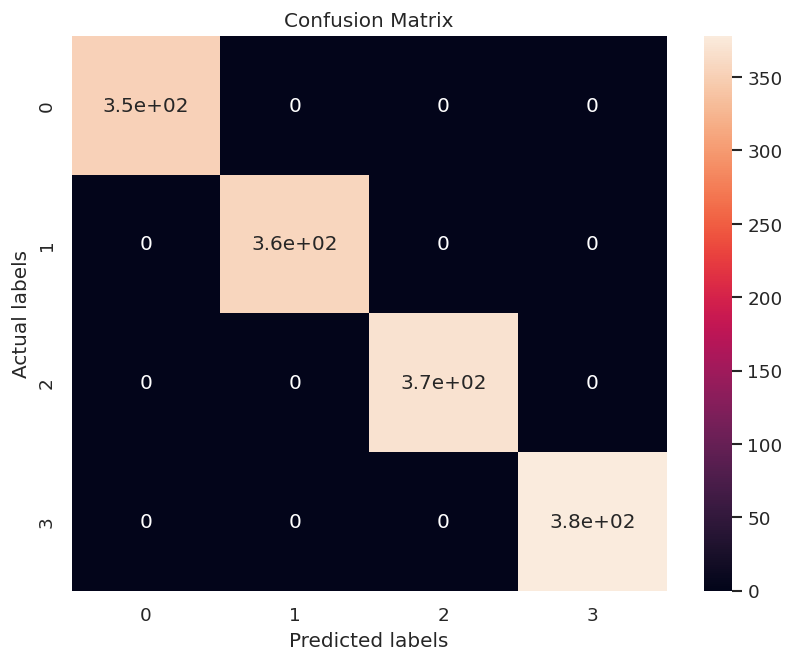

<Figure size 960x720 with 0 Axes>



Confusion matrix for test set:
[[91  8  0  0]
 [ 8 77  9  0]
 [ 0 13 62 13]
 [ 0  0 13 70]]


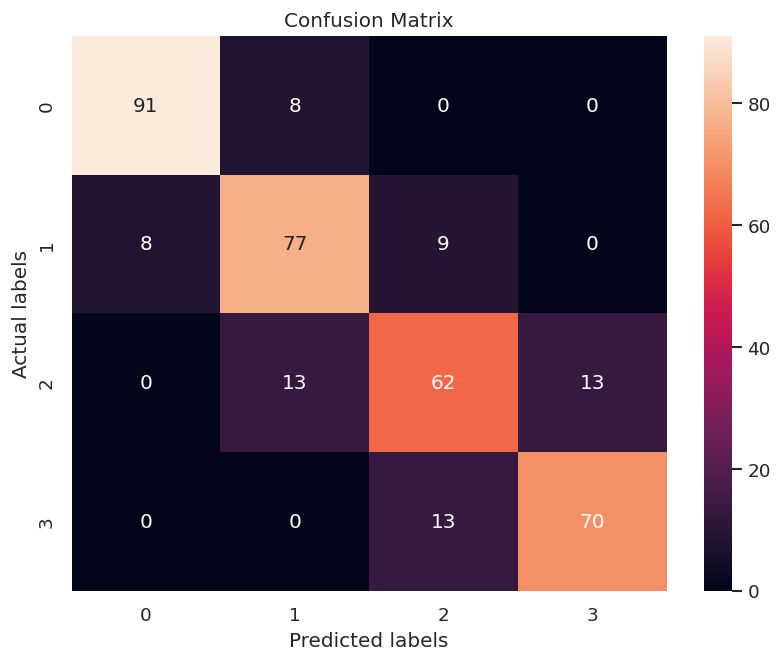

<Figure size 960x720 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        99
           1       0.79      0.82      0.80        94
           2       0.74      0.70      0.72        88
           3       0.84      0.84      0.84        83

    accuracy                           0.82       364
   macro avg       0.82      0.82      0.82       364
weighted avg       0.82      0.82      0.82       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                3
558              2                2
453              0                0
683              2                2


In [252]:
dec=decision_tree_classification(X, Y)

In [253]:
# store the metrics of xgboost
dec_acc = dec[0]
dec_precision = dec[1]
dec_recall = dec[2]
dec_roc = dec[3]

In [254]:
# function for random forest
def random_forest(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(100,300,3)],
              'max_depth': [int(x) for x in np.linspace(5,10,5)],
              'min_samples_split': [int(x) for x in np.linspace(5,15,3)],
              'min_samples_leaf': [int(x) for x in np.linspace(1,5,5)]}

  # build a random forest model
  rf_model = RandomForestClassifier()

  # random search
  rf_grid = RandomizedSearchCV(estimator=rf_model,
                       param_distributions= param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

  rf_grid.fit(X_train,Y_train)

  print(rf_grid.best_estimator_)
  rf_optimal_model = rf_grid.best_estimator_
  print(rf_grid.best_params_)

  # get the predicted probabilities
  rf_train_prob = rf_optimal_model.predict_proba(X_train)
  rf_test_prob = rf_optimal_model.predict_proba(X_test)

  # get the predicted classes
  rf_train_class = rf_optimal_model.predict(X_train)
  rf_test_class = rf_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  rf_train_acc = accuracy_score(Y_train, rf_train_class)
  rf_test_acc = accuracy_score(Y_test, rf_test_class)

  print("\n")
  print("The accuracy on train dataset is", rf_train_acc)
  print("The accuracy on test dataset is", rf_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  rf_precision = precision_score(Y_test, rf_test_class, average='weighted')
  print("The precision on test dataset is", rf_precision)

  rf_recall = recall_score(Y_test, rf_test_class, average='weighted')
  print("The recall on test dataset is", rf_recall)

  # calculating roc_auc_score on the test set
  rf_roc = roc_auc_score(Y_test, rf_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", rf_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, rf_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  matrix(Y_test, rf_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, rf_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': rf_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  # calculate the feature importances
  features = X_train.columns
  importances = rf_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return rf_test_acc, rf_precision, rf_recall, rf_roc

The shape of training set is (1455, 17) (1455,)
The shape of testing set is (364, 17) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=7, min_samples_leaf=1,

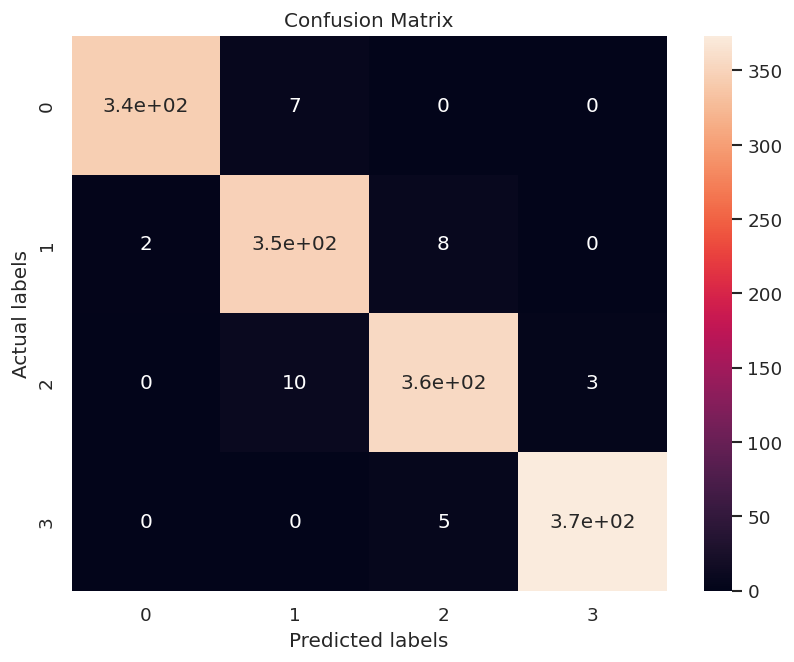

<Figure size 960x720 with 0 Axes>


 Confusion matrix for test set:
[[95  4  0  0]
 [ 4 80 10  0]
 [ 0 13 65 10]
 [ 0  0 11 72]]


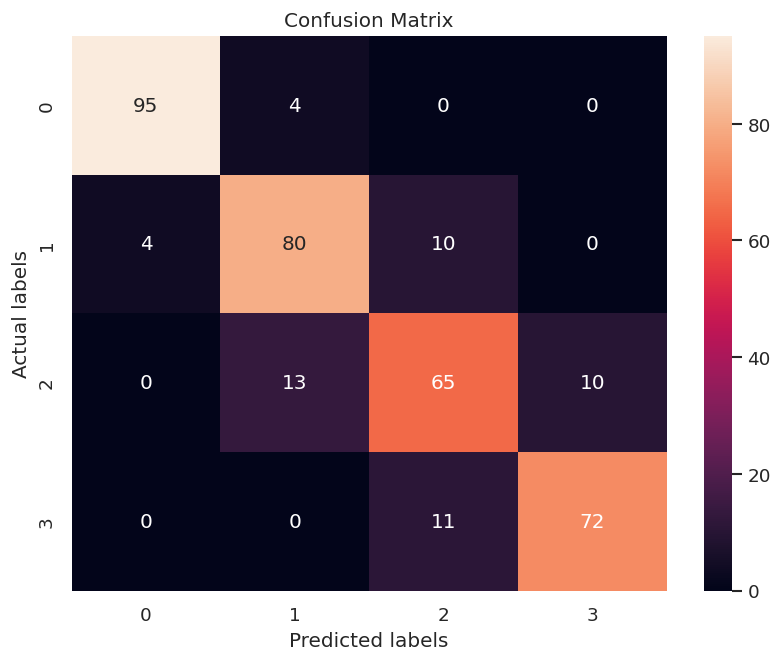

<Figure size 960x720 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        99
           1       0.82      0.85      0.84        94
           2       0.76      0.74      0.75        88
           3       0.88      0.87      0.87        83

    accuracy                           0.86       364
   macro avg       0.85      0.85      0.85       364
weighted avg       0.86      0.86      0.86       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                2
453              0                0
683              2                2


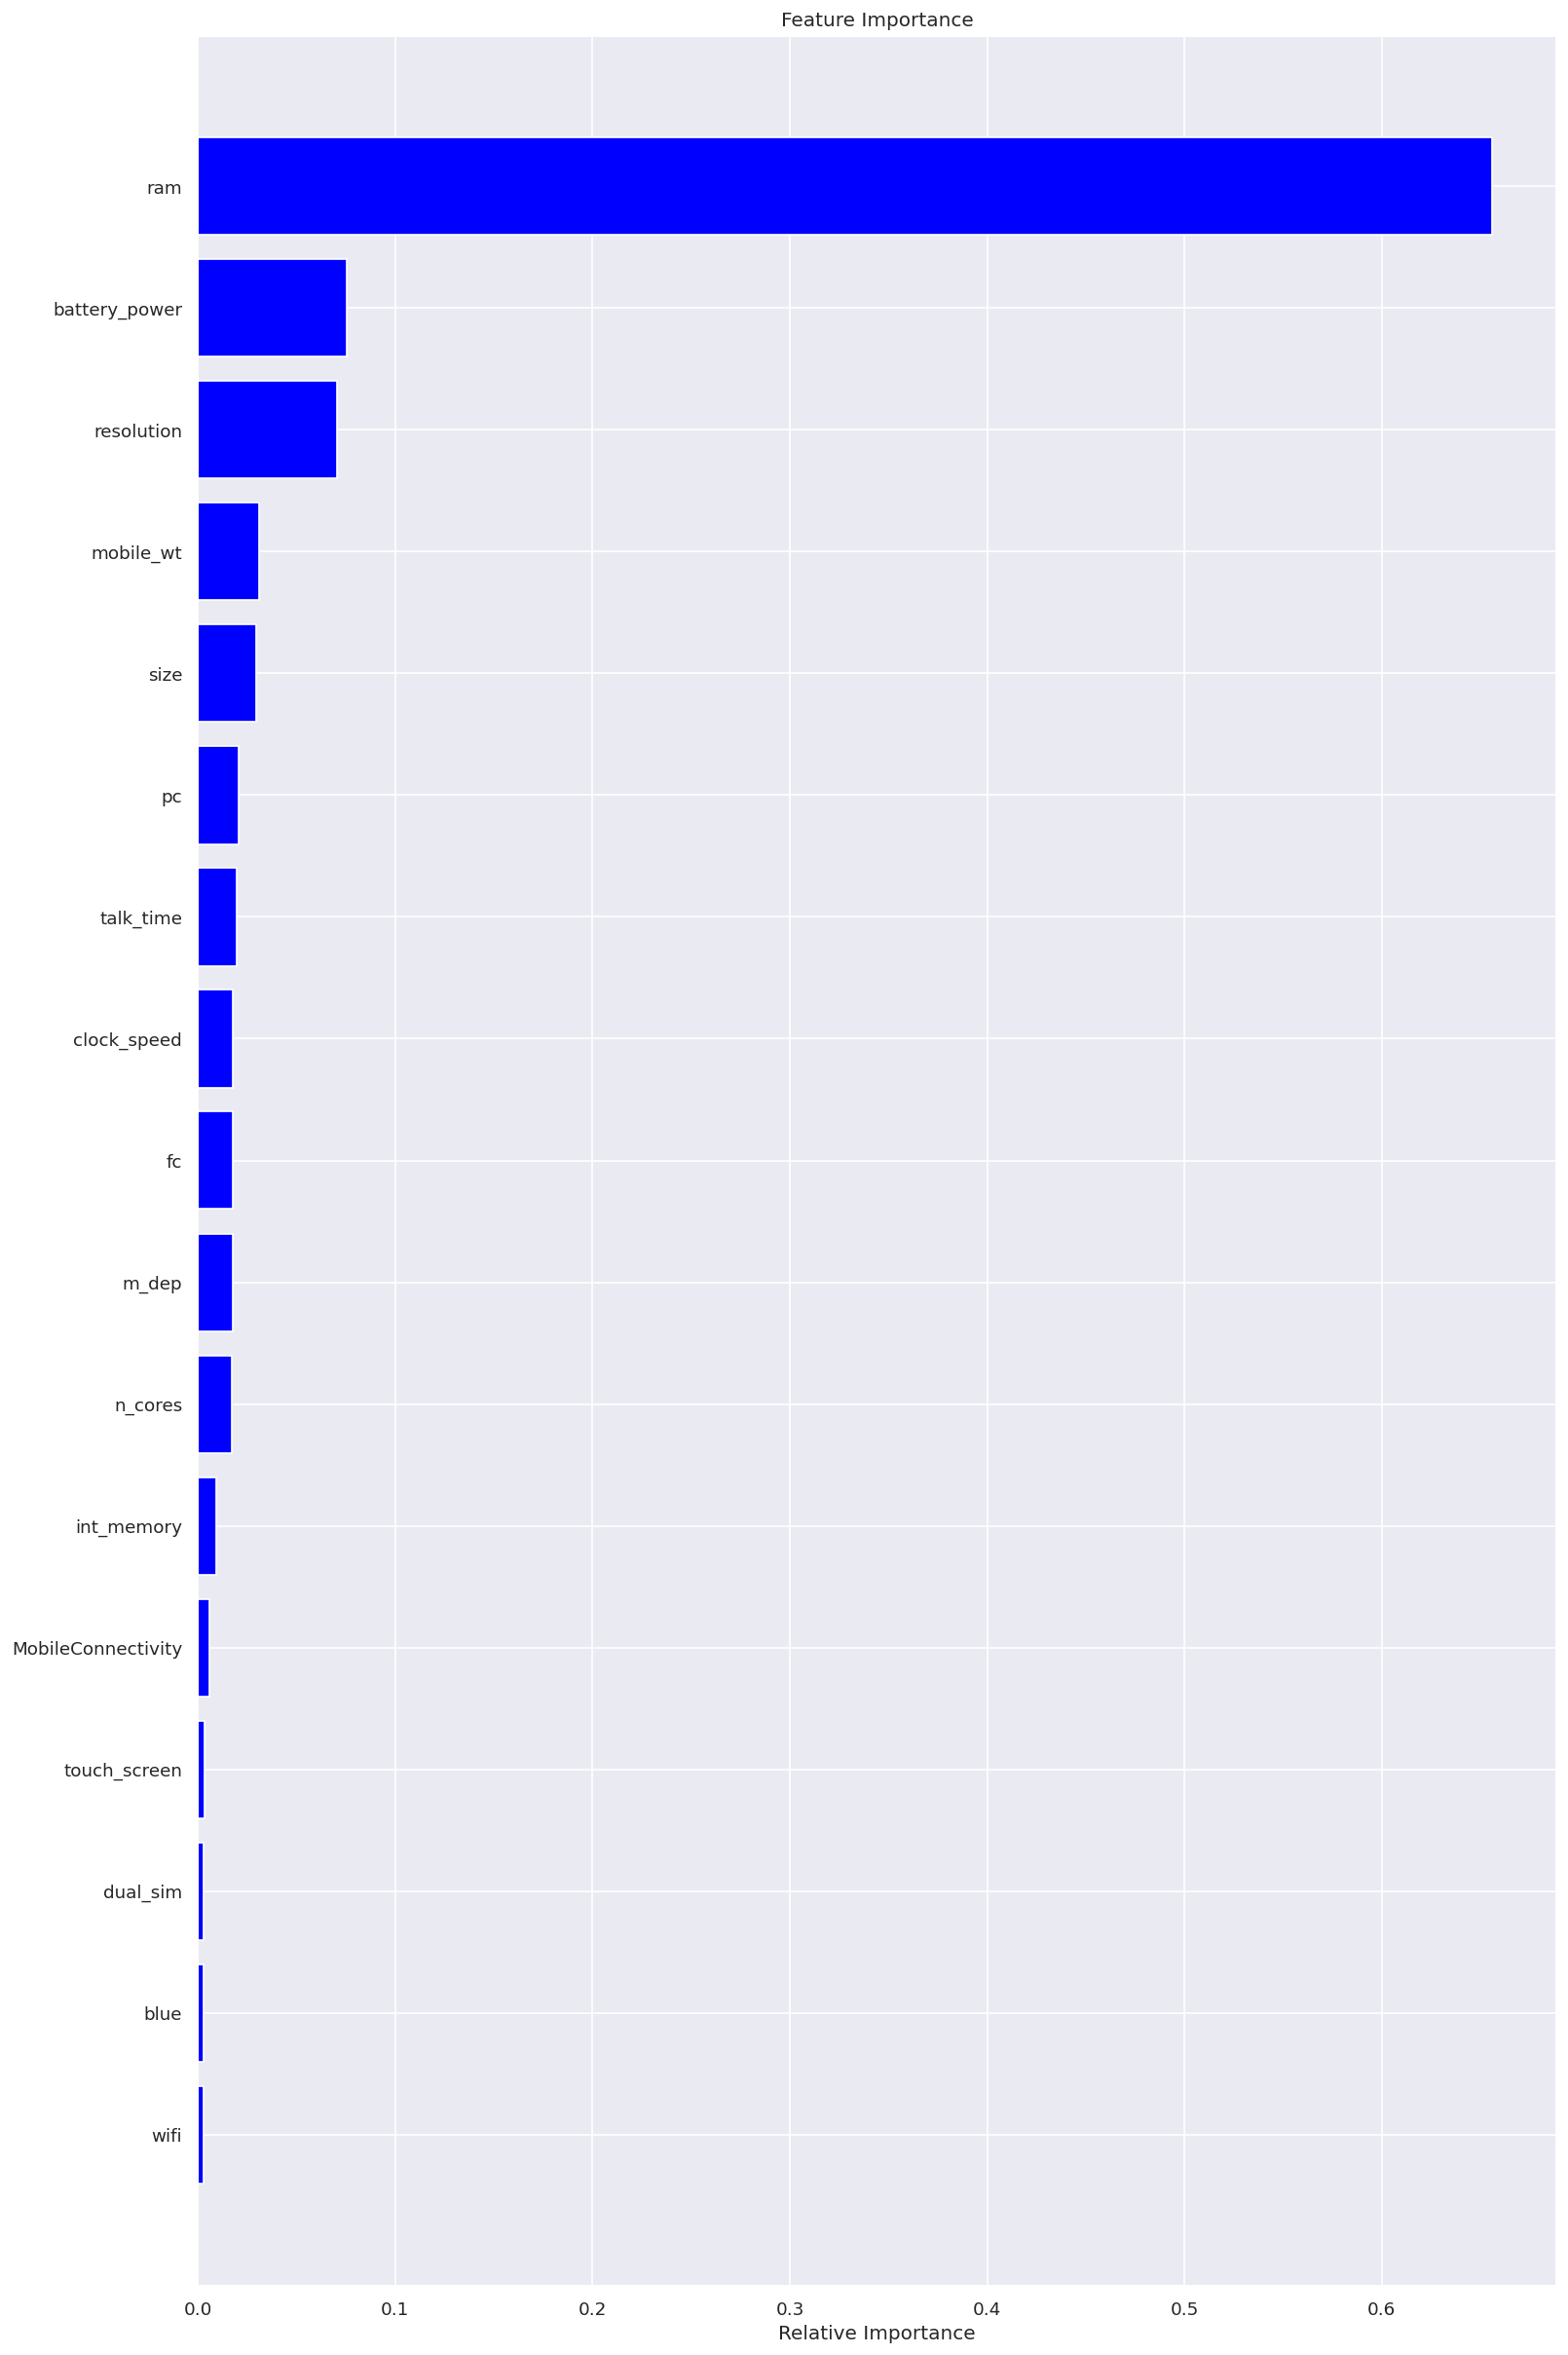

               Feature  Feature Importance
10                 ram                0.66
0        battery_power                0.08
14          resolution                0.07
7            mobile_wt                0.03
15                size                0.03
11           talk_time                0.02
9                   pc                0.02
8              n_cores                0.02
6                m_dep                0.02
4                   fc                0.02
2          clock_speed                0.02
5           int_memory                0.01
16  MobileConnectivity                0.01
1                 blue                0.00
12        touch_screen                0.00
13                wifi                0.00
3             dual_sim                0.00


In [255]:
#Running the Model
rf = random_forest(X,Y)

In [256]:
# store the metrics of xgboost
rf_acc = rf[0]
rf_precision = rf[1]
rf_recall = rf[2]
rf_roc = rf[3]

In [257]:
# a dataframe to compare all the models
models_df = pd.DataFrame(
    {'Models': ['Logistic Regression','svm classification','decision tree classification','Random Forest'],
     'Accuracy': [log_acc, sv_acc, dec_acc, rf_acc],
     'Precision': [log_precision,sv_precision,dec_precision, rf_precision],
     'Recall': [log_recall,sv_recall,dec_recall, rf_recall],
     'ROC AUC': [log_roc,sv_roc,dec_roc, rf_roc]}
)
models_df.sort_values(by=['Accuracy'], ascending=False, inplace=True)
models_df

,Models,Accuracy,Precision,Recall,ROC AUC
1,svm classification,0.956044,0.955968,0.956044,0.994650
0,Logistic Regression,0.947802,0.947450,0.947802,0.994450
3,Random Forest,0.857143,0.856911,0.857143,0.970182
2,decision tree classification,0.824176,0.823653,0.824176,0.881827


In [258]:

#Installing the shap library
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.3 MB/s eta 0:00:00


In [259]:
# Let's import Xgboost library
import xgboost as xgb

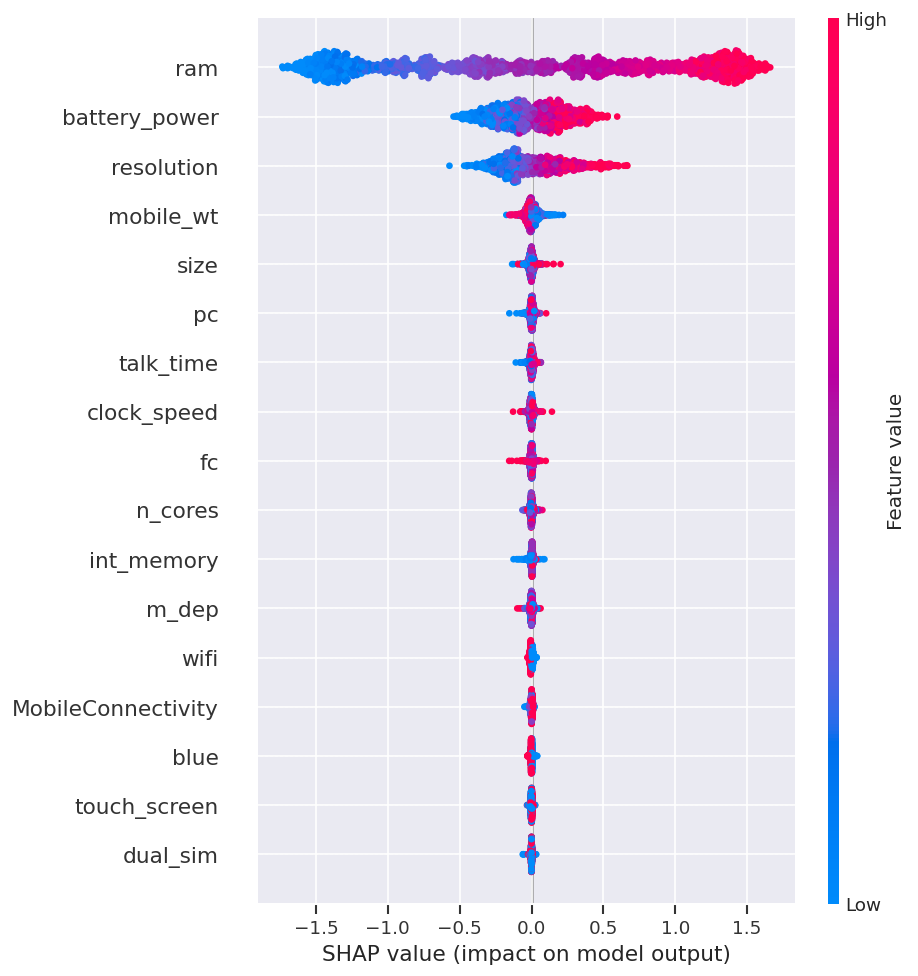

In [260]:
# Train XGBoost model
x_train = df.drop(columns=['price_range'])  # Your transformed features (excluding the target variable)
y_train = df['price_range']  # Your target variable
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(x_train)
# Generate the summary plot
shap.summary_plot(shap_values, x_train)
plt.show()

* Why did you pick the specific chart?
1. The SHAP summary plot is chosen to gain insights into the feature importances and their impact on the target variable. It helps in understanding which features have the most significant influence on the predicted values.

* What is/ are the insight(s) found from chart ?
1. SHAP analysis identified 'Ram', 'Battery Power' and 'Resolution' as the most important features in the model, indecating their significant contributions to the prediction process.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* The accuracy score is considered the most suitable evaluation metric for model selection.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Support Vector Machine (SVM) performs best among the all machine algorithms followed by logistic regreesion.

# **Conclusion**

1. I observed a consistent positive correlation between RAM capacity and price range as we moved from lower-cost to higher-cost mobile devices.
2. Positive correlation observed between battery capacity and price range
3. Graph reveals a positive correlation between mobile size and price range, where larger-sized mobiles tend to have higher prices, while average-sized mobiles predominantly belong to lower price ranges.